# Requirments


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd
import numpy as np

# DATA NORMOLISING

In [5]:
# Load the data
df = pd.read_csv("../Data/AVONET_BIRDLIFE.csv", encoding='ISO-8859-1')

# Clean and remove rows with missing key values
df = df[['species', 'Wing.Length', 'Hand-Wing.Index', 'Tail.Length', 'Mass']].dropna()

# Feature Engineering
df['Wingspan'] = df['Wing.Length'] * 2  # approx. estimate
df['Aspect_Ratio'] = df['Hand-Wing.Index']  # use directly or normalize
df['Wing_Area'] = df['Wingspan'] ** 2 / df['Aspect_Ratio']
df['Wing_Loading'] = df['Mass'] / df['Wing_Area']

# Normalize features for RL environment
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df[['Wingspan', 'Aspect_Ratio', 'Tail.Length', 'Wing_Loading']])
normalized_df = pd.DataFrame(normalized, columns=['Wingspan', 'Aspect_Ratio', 'Tail_Length', 'Wing_Loading'])

# Final dataset ready for simulation input
print(normalized_df.head(100))


    Wingspan  Aspect_Ratio  Tail_Length  Wing_Loading
0   0.297670      0.455526     0.207826      0.000006
1   0.236262      0.442049     0.172881      0.000005
2   0.290580      0.330189     0.229113      0.000006
3   0.255888      0.425876     0.173127      0.000005
4   0.275386      0.540431     0.188754      0.000007
..       ...           ...          ...           ...
95  0.437706      0.509434     0.226283      0.000008
96  0.454419      0.443396     0.272425      0.000013
97  0.400228      0.334232     0.181002      0.000007
98  0.449607      0.412399     0.253599      0.000010
99  0.674728      0.443396     0.322505      0.000015

[100 rows x 4 columns]


# version 1

=== Bird Wing Morphology to Airfoil Shape Generator ===
Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance

Successfully loaded AVONET data with 11009 species
Using 11009 birds with complete morphological data

Sample species in dataset:
                   species  Wing.Length  Secondary1  Kipps.Distance
0    Accipiter_albogularis        235.2       159.5            81.8
1         Accipiter_badius        186.7       127.4            62.5
2        Accipiter_bicolor        229.6       174.8            56.6
3     Accipiter_brachyurus        202.2       138.1            64.1
4       Accipiter_brevipes        217.6       129.9            87.8
5        Accipiter_butleri        166.0       123.1            42.9
6    Accipiter_castanilius        163.5       123.1            38.9
7  Accipiter_cirrocephalus        213.0       133.7            81.3
8       Accipiter_collaris        165.9       115.2            49.5
9       Accipiter_cooperii        241.2       163.5            77.

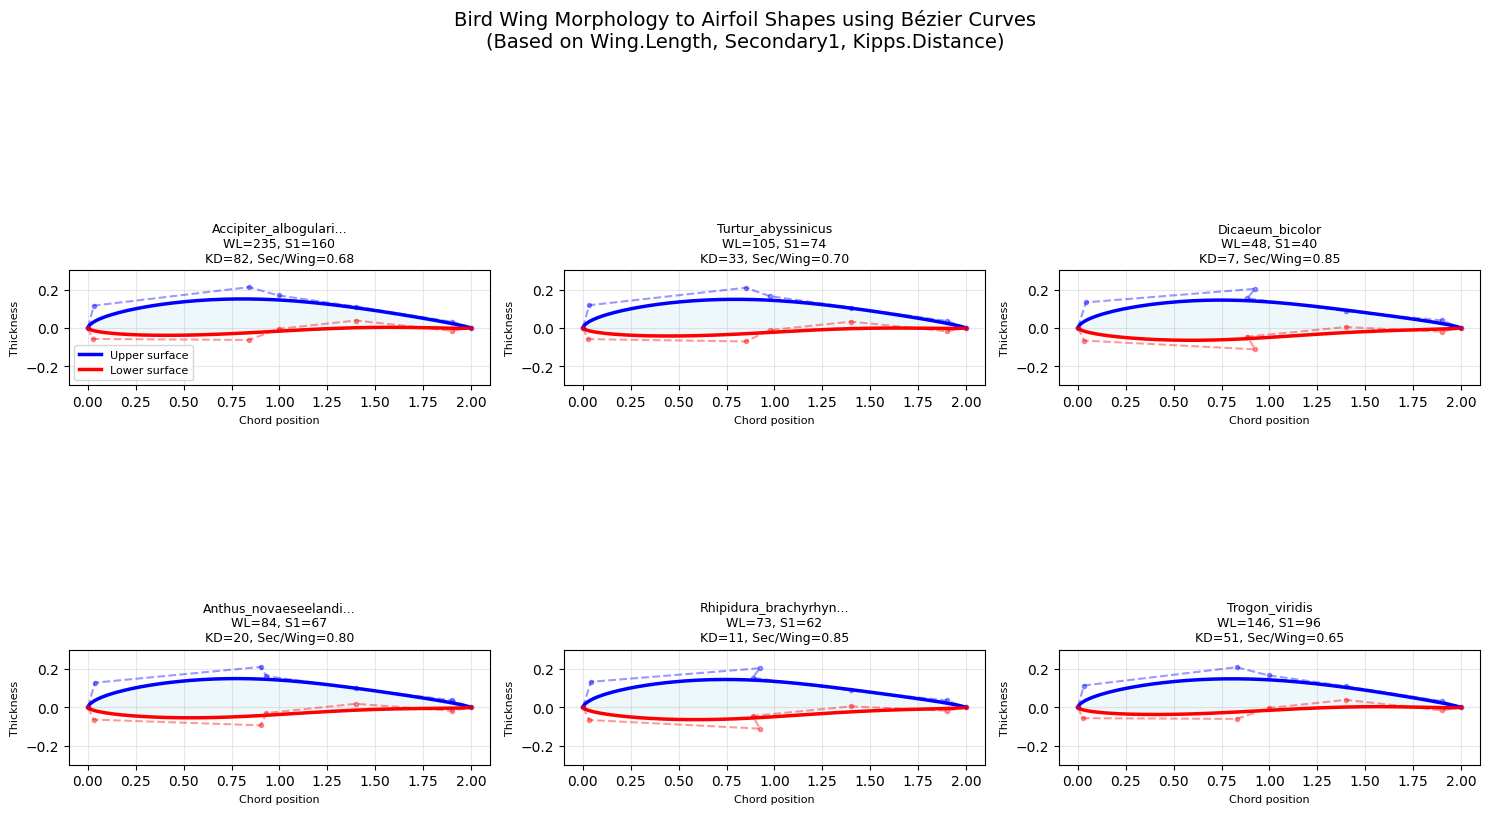


=== Analyzing Wing Morphometry Effects ===


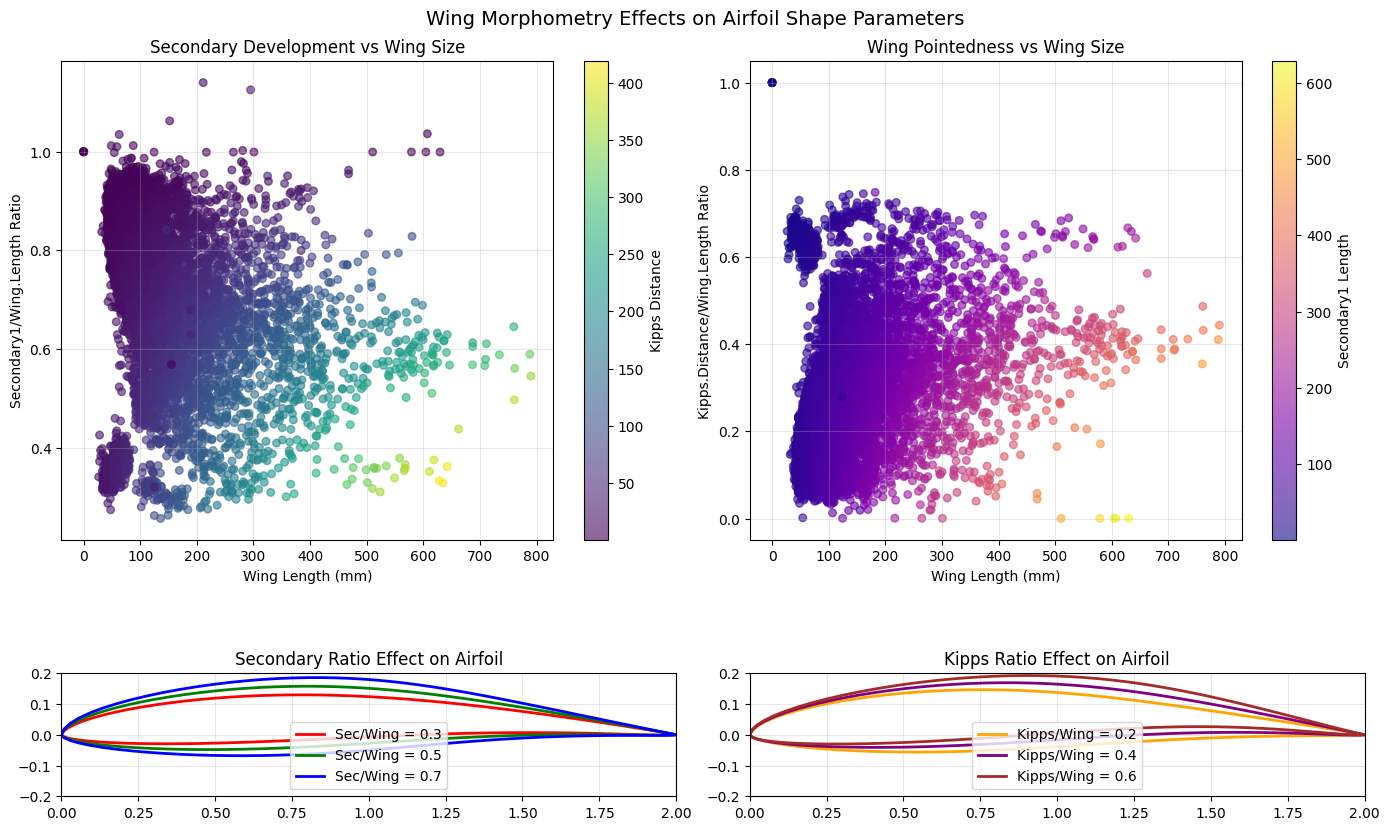


Exporting 3 representative airfoil coordinate files...
Saved: airfoil_Accipiter_albogularis_WL235.dat
Saved: airfoil_Accipiter_badius_WL187.dat
Saved: airfoil_Accipiter_bicolor_WL230.dat

=== Analysis Complete ===
Ready for integration with your RL framework!


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class BirdAirfoilGenerator:
    def __init__(self):
        self.fig, self.axes = plt.subplots(2, 3, figsize=(15, 10))
        self.fig.suptitle('Bird Wing Morphology to Airfoil Shapes using Bézier Curves\n(Based on Wing.Length, Secondary1, Kipps.Distance)', fontsize=14)
        
    def load_and_process_data(self, csv_path="../Data/AVONET_BIRDLIFE.csv"):
        """Load and process AVONET bird data using exact column names"""
        try:
            df = pd.read_csv(csv_path, encoding='ISO-8859-1')
            print(f"Successfully loaded AVONET data with {len(df)} species")
        except Exception as e:
            print(f"Could not load CSV file: {e}")
            print("Creating sample data based on AVONET structure...")
            df = self.create_sample_avonet_data()
        
        # Use exact column names from your dataset
        required_cols = ['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']
        
        # Check which columns exist
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            print(f"Missing columns: {missing_cols}")
            return self.create_sample_avonet_data()
        
        # Extract the key morphological measurements
        df_clean = df[required_cols].dropna()
        print(f"Using {len(df_clean)} birds with complete morphological data")
        
        # Display some sample species for reference
        print("\nSample species in dataset:")
        print(df_clean[['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance']].head(10))
        
        # Normalize the morphological measurements for airfoil generation
        scaler = MinMaxScaler()
        features = ['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']
        normalized = scaler.fit_transform(df_clean[features])
        normalized_df = pd.DataFrame(normalized, columns=features)
        
        # Add species names for reference
        normalized_df['species'] = df_clean['species'].reset_index(drop=True)
        
        return normalized_df, df_clean, scaler
    
    def create_sample_avonet_data(self):
        """Create sample data matching AVONET structure with realistic bird morphology"""
        np.random.seed(42)
        
        # Define realistic bird types with their morphological characteristics
        bird_types = [
            # [species_name, wing_length, secondary1, kipps_distance, tail_length]
            ("Trochilus_colubris", 45, 25, 20, 15),  # Ruby-throated Hummingbird
            ("Tachycineta_bicolor", 112, 68, 44, 58),  # Tree Swallow  
            ("Turdus_migratorius", 130, 85, 45, 95),  # American Robin
            ("Accipiter_striatus", 165, 95, 70, 140),  # Sharp-shinned Hawk
            ("Buteo_jamaicensis", 380, 220, 160, 190),  # Red-tailed Hawk
            ("Corvus_brachyrhynchos", 270, 180, 90, 175),  # American Crow
            ("Diomedea_exulans", 630, 280, 350, 200),  # Wandering Albatross
            ("Falco_peregrinus", 290, 165, 125, 150),  # Peregrine Falcon
            ("Apus_apus", 165, 85, 80, 75),  # Common Swift
            ("Colibri_thalassinus", 52, 28, 24, 25),  # Green Violet-ear
        ]
        
        # Expand dataset with variations
        expanded_data = []
        for i, (base_species, wl, s1, kd, tl) in enumerate(bird_types):
            for j in range(10):  # Create 10 variations of each type
                variation = np.random.normal(1.0, 0.15)  # 15% variation
                expanded_data.append({
                    'species': f"{base_species}_var{j+1}",
                    'Wing.Length': max(20, wl * variation),
                    'Secondary1': max(10, s1 * variation),
                    'Kipps.Distance': max(5, kd * variation),
                    'Tail.Length': max(10, tl * variation)
                })
        
        return pd.DataFrame(expanded_data)
    
    def bezier_curve(self, control_points, num_points=100):
        """Generate Bézier curve from control points"""
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                binomial_coeff = comb(n, j)
                term = binomial_coeff * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += term * control_points[j]
        
        return curve
    
    def generate_airfoil_from_wing_measurements(self, wing_length, secondary1, kipps_distance, tail_length):
        """
        Generate airfoil control points based on AVONET wing measurements
        
        Parameters from your morphological diagram:
        - wing_length: Total wing length (measurement 6 in diagram)
        - secondary1: Length of longest secondary feather (measurement 7)  
        - kipps_distance: Wing tip to secondary tip distance (measurement 8)
        - tail_length: Tail length (affects trailing edge)
        """
        
        chord_length = 2.0  # Base chord for visualization
        
        # Calculate morphological ratios (key for airfoil shape)
        secondary_ratio = secondary1 / wing_length if wing_length > 0 else 0.6
        kipps_ratio = kipps_distance / wing_length if wing_length > 0 else 0.3
        wing_pointedness = kipps_ratio  # Higher Kipp's = more pointed wing
        
        # Airfoil characteristics based on wing morphology:
        
        # 1. Thickness influenced by secondary feather development
        # Longer secondaries relative to wing = broader, thicker airfoil
        max_thickness = 0.06 + secondary_ratio * 0.10
        
        # 2. Camber influenced by wing loading and flight style
        # Higher Kipp's distance suggests fast, efficient flight = more camber
        camber = 0.015 + kipps_ratio * 0.08
        
        # 3. Leading edge shape from wing pointedness
        # More pointed wings (high Kipp's) = sharper leading edge
        leading_edge_radius = 0.025 - kipps_ratio * 0.015
        leading_edge_radius = max(0.005, leading_edge_radius)
        
        # 4. Thickness distribution based on secondary arrangement
        # Well-developed secondaries = thickness further back
        max_thickness_position = 0.25 + secondary_ratio * 0.20
        
        # 5. Camber distribution
        max_camber_position = 0.30 + kipps_ratio * 0.15
        
        # 6. Trailing edge from tail development
        # Longer tails suggest more gradual trailing edge
        trailing_edge_angle = max(0.002, 0.02 * (1 - tail_length))
        
        # Generate upper surface control points
        upper_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius, max_thickness * 0.8],  # Leading edge curvature
            [max_thickness_position, camber + max_thickness],  # Max thickness region
            [max_camber_position + 0.1, camber + max_thickness * 0.7],  # Post-camber
            [0.7, camber + max_thickness * 0.3],  # Rear section
            [0.95, trailing_edge_angle * 2],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Generate lower surface control points  
        lower_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius * 0.8, -max_thickness * 0.4],  # Leading edge curvature
            [max_thickness_position, camber - max_thickness * 0.9],  # Max thickness region
            [max_camber_position + 0.1, camber - max_thickness * 0.5],  # Post-camber
            [0.7, camber - max_thickness * 0.2],  # Rear section
            [0.95, -trailing_edge_angle],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Scale by chord length
        upper_cp[:, 0] *= chord_length
        lower_cp[:, 0] *= chord_length
        
        return upper_cp, lower_cp
    
    def plot_bird_airfoil_family(self, normalized_df, original_df):
        """Plot airfoils representing different bird wing morphologies"""
        
        # Select 6 birds representing different morphological types
        n_birds = len(normalized_df)
        if n_birds < 6:
            indices = list(range(n_birds))
        else:
            # Select birds with diverse morphology
            indices = [
                0,  # First bird
                n_birds // 6,  # Small wing type
                n_birds // 3,  # Medium wing type  
                n_birds // 2,  # Another type
                2 * n_birds // 3,  # Large wing type
                n_birds - 1  # Last bird
            ]
        
        for plot_idx, bird_idx in enumerate(indices):
            if plot_idx >= 6:
                break
                
            row = plot_idx // 3
            col = plot_idx % 3
            ax = self.axes[row, col]
            
            # Get bird data
            bird_norm = normalized_df.iloc[bird_idx]
            bird_orig = original_df.iloc[bird_idx]
            
            wing_length = bird_norm['Wing.Length']
            secondary1 = bird_norm['Secondary1'] 
            kipps_distance = bird_norm['Kipps.Distance']
            tail_length = bird_norm['Tail.Length']
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                wing_length, secondary1, kipps_distance, tail_length
            )
            
            # Generate Bézier curves
            upper_curve = self.bezier_curve(upper_cp, 150)
            lower_curve = self.bezier_curve(lower_cp, 150)
            
            # Plot airfoil
            ax.plot(upper_curve[:, 0], upper_curve[:, 1], 'b-', linewidth=2.5, label='Upper surface')
            ax.plot(lower_curve[:, 0], lower_curve[:, 1], 'r-', linewidth=2.5, label='Lower surface')
            
            # Plot control points for reference
            ax.plot(upper_cp[:, 0], upper_cp[:, 1], 'bo--', alpha=0.4, markersize=3)
            ax.plot(lower_cp[:, 0], lower_cp[:, 1], 'ro--', alpha=0.4, markersize=3)
            
            # Fill airfoil
            all_x = np.concatenate([upper_curve[:, 0], lower_curve[::-1, 0]])
            all_y = np.concatenate([upper_curve[:, 1], lower_curve[::-1, 1]])
            ax.fill(all_x, all_y, alpha=0.2, color='lightblue')
            
            # Calculate ratios for display
            sec_ratio = bird_orig['Secondary1'] / bird_orig['Wing.Length']
            kipps_ratio = bird_orig['Kipps.Distance'] / bird_orig['Wing.Length']
            
            # Formatting
            ax.set_xlim(-0.1, 2.1)
            ax.set_ylim(-0.3, 0.3)
            ax.set_aspect('equal')
            ax.grid(True, alpha=0.3)
            
            # Species name and measurements
            species_name = bird_orig['species'][:20] + "..." if len(bird_orig['species']) > 20 else bird_orig['species']
            title = f"{species_name}\n"
            title += f"WL={bird_orig['Wing.Length']:.0f}, S1={bird_orig['Secondary1']:.0f}\n"
            title += f"KD={bird_orig['Kipps.Distance']:.0f}, Sec/Wing={sec_ratio:.2f}"
            
            ax.set_title(title, fontsize=9)
            ax.set_xlabel('Chord position', fontsize=8)
            ax.set_ylabel('Thickness', fontsize=8)
            
            if plot_idx == 0:
                ax.legend(fontsize=8)
        
        plt.tight_layout()
        return self.fig
    
    def analyze_morphometric_relationships(self, normalized_df, original_df):
        """Analyze relationships between wing measurements and airfoil characteristics"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Wing Morphometry Effects on Airfoil Shape Parameters', fontsize=14)
        
        # Calculate morphological ratios
        original_df = original_df.copy()
        original_df['Secondary_Ratio'] = original_df['Secondary1'] / original_df['Wing.Length']
        original_df['Kipps_Ratio'] = original_df['Kipps.Distance'] / original_df['Wing.Length']
        original_df['Aspect_Estimate'] = original_df['Wing.Length'] ** 2 / (original_df['Wing.Length'] * original_df['Secondary1'])
        
        # Plot 1: Secondary ratio vs wing length
        ax1 = axes[0, 0]
        scatter = ax1.scatter(original_df['Wing.Length'], original_df['Secondary_Ratio'], 
                            c=original_df['Kipps.Distance'], cmap='viridis', alpha=0.6, s=30)
        ax1.set_xlabel('Wing Length (mm)')
        ax1.set_ylabel('Secondary1/Wing.Length Ratio')
        ax1.set_title('Secondary Development vs Wing Size')
        plt.colorbar(scatter, ax=ax1, label='Kipps Distance')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Kipp's ratio vs wing length  
        ax2 = axes[0, 1]
        scatter2 = ax2.scatter(original_df['Wing.Length'], original_df['Kipps_Ratio'],
                             c=original_df['Secondary1'], cmap='plasma', alpha=0.6, s=30)
        ax2.set_xlabel('Wing Length (mm)')
        ax2.set_ylabel('Kipps.Distance/Wing.Length Ratio')
        ax2.set_title('Wing Pointedness vs Wing Size')
        plt.colorbar(scatter2, ax=ax2, label='Secondary1 Length')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Demonstrate morphology-to-airfoil mapping
        ax3 = axes[1, 0]
        # Show how different secondary ratios affect airfoil thickness
        sec_ratios = [0.3, 0.5, 0.7]
        colors = ['red', 'green', 'blue']
        for i, sec_ratio in enumerate(sec_ratios):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, sec_ratio, 0.3, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax3.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2, 
                    label=f'Sec/Wing = {sec_ratio}')
            ax3.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax3.set_xlim(0, 2)
        ax3.set_ylim(-0.2, 0.2)
        ax3.set_title('Secondary Ratio Effect on Airfoil')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_aspect('equal')
        
        # Plot 4: Kipp's distance effect
        ax4 = axes[1, 1]
        kipps_ratios = [0.2, 0.4, 0.6]
        colors = ['orange', 'purple', 'brown']
        for i, kipps_ratio in enumerate(kipps_ratios):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, kipps_ratio, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax4.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2,
                    label=f'Kipps/Wing = {kipps_ratio}')
            ax4.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax4.set_xlim(0, 2)
        ax4.set_ylim(-0.2, 0.2)
        ax4.set_title('Kipps Ratio Effect on Airfoil')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_aspect('equal')
        
        plt.tight_layout()
        return fig
        
    def export_airfoil_coordinates(self, normalized_df, original_df, num_export=5):
        """Export airfoil coordinates for CFD analysis"""
        
        print(f"\nExporting {num_export} representative airfoil coordinate files...")
        
        for i in range(min(num_export, len(normalized_df))):
            bird_norm = normalized_df.iloc[i]
            bird_orig = original_df.iloc[i]
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                bird_norm['Wing.Length'], bird_norm['Secondary1'], 
                bird_norm['Kipps.Distance'], bird_norm['Tail.Length']
            )
            
            # Generate high-resolution curves for CFD
            upper_curve = self.bezier_curve(upper_cp, 200)
            lower_curve = self.bezier_curve(lower_cp, 200)
            
            # Combine upper and lower surfaces (clockwise from trailing edge)
            airfoil_coords = np.vstack([
                upper_curve,
                lower_curve[::-1]  # Reverse lower surface
            ])
            
            # Save coordinates
            species_name = bird_orig['species'].replace(' ', '_').replace('/', '_')[:30]
            filename = f'airfoil_{species_name}_WL{bird_orig["Wing.Length"]:.0f}.dat'
            
            header = f"""# Bird-inspired airfoil: {bird_orig['species']}
# Wing.Length: {bird_orig['Wing.Length']:.1f} mm
# Secondary1: {bird_orig['Secondary1']:.1f} mm  
# Kipps.Distance: {bird_orig['Kipps.Distance']:.1f} mm
# Coordinates: x, y (normalized chord)"""
            
            np.savetxt(filename, airfoil_coords, header=header, fmt='%.6f', delimiter=' ')
            print(f"Saved: {filename}")

def main():
    """Main execution function"""
    print("=== Bird Wing Morphology to Airfoil Shape Generator ===")
    print("Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance\n")
    
    # Initialize generator
    generator = BirdAirfoilGenerator()
    
    # Load and process data
    try:
        normalized_df, original_df, scaler = generator.load_and_process_data()
        print(f"\nSuccessfully processed {len(normalized_df)} bird species")
        
        # Display morphological statistics
        print("\n=== Morphological Statistics (Original Units) ===")
        print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']].describe())
        
        # Generate airfoil family
        print("\n=== Generating Bird-Inspired Airfoil Shapes ===")
        fig1 = generator.plot_bird_airfoil_family(normalized_df, original_df)
        plt.show()
        
        # Analyze morphometric relationships
        print("\n=== Analyzing Wing Morphometry Effects ===")
        fig2 = generator.analyze_morphometric_relationships(normalized_df, original_df)
        plt.show()
        
        # Export airfoil coordinates for CFD
        generator.export_airfoil_coordinates(normalized_df, original_df, num_export=3)
        
        print("\n=== Analysis Complete ===")
        print("Ready for integration with your RL framework!")
        
    except Exception as e:
        print(f"Error in main execution: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

# Version 2 including hand wing index

=== Bird Wing Morphology to Airfoil Shape Generator ===
Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance

Successfully loaded AVONET data with 11009 species
Using 11009 birds with complete morphological data

Sample species in dataset:
                   species  Wing.Length  Secondary1  Kipps.Distance  \
0    Accipiter_albogularis        235.2       159.5            81.8   
1         Accipiter_badius        186.7       127.4            62.5   
2        Accipiter_bicolor        229.6       174.8            56.6   
3     Accipiter_brachyurus        202.2       138.1            64.1   
4       Accipiter_brevipes        217.6       129.9            87.8   
5        Accipiter_butleri        166.0       123.1            42.9   
6    Accipiter_castanilius        163.5       123.1            38.9   
7  Accipiter_cirrocephalus        213.0       133.7            81.3   
8       Accipiter_collaris        165.9       115.2            49.5   
9       Accipiter_cooperii        24

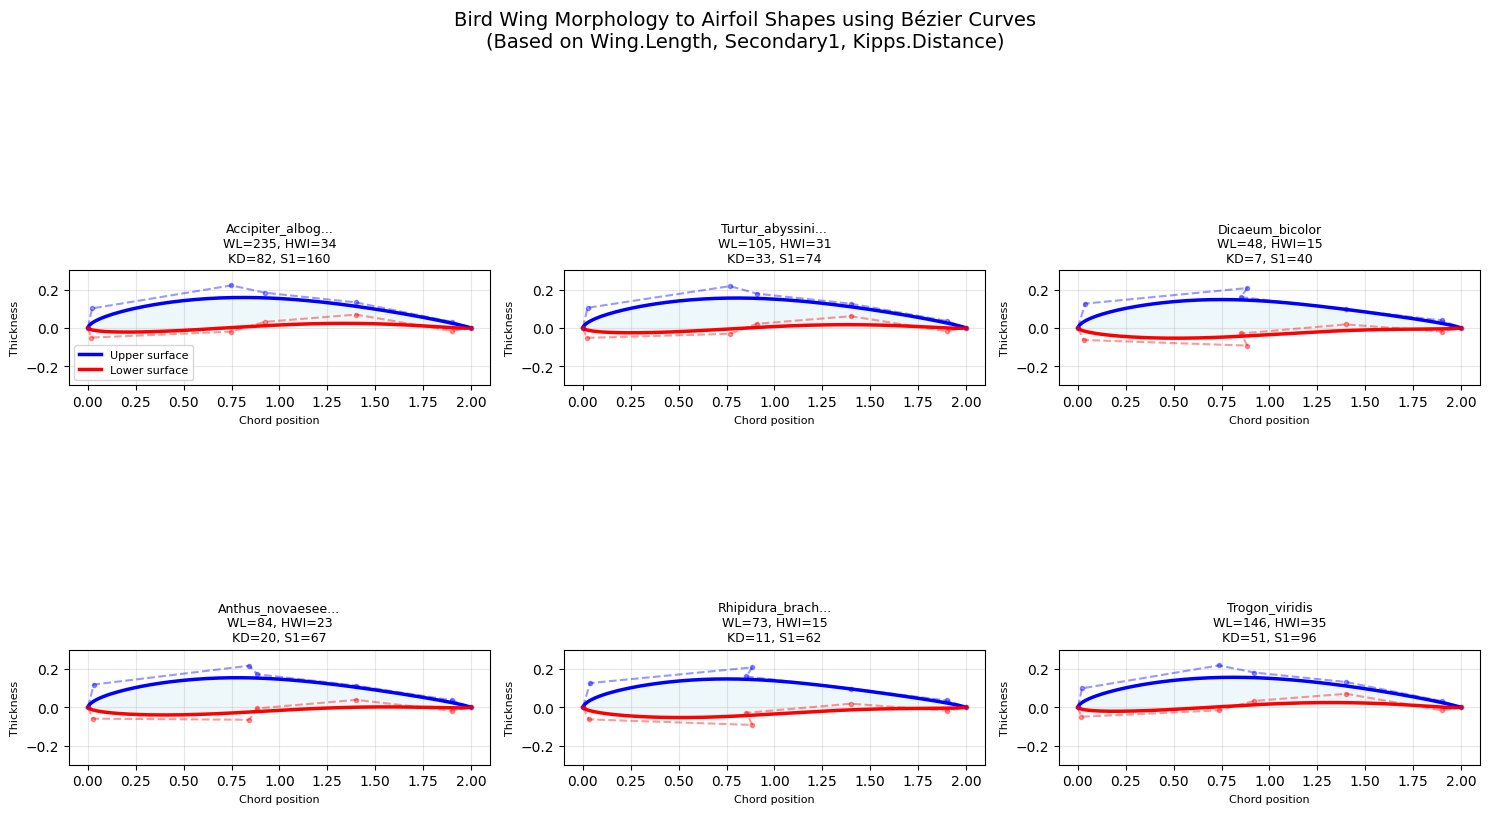


=== Analyzing Wing Morphometry Effects ===


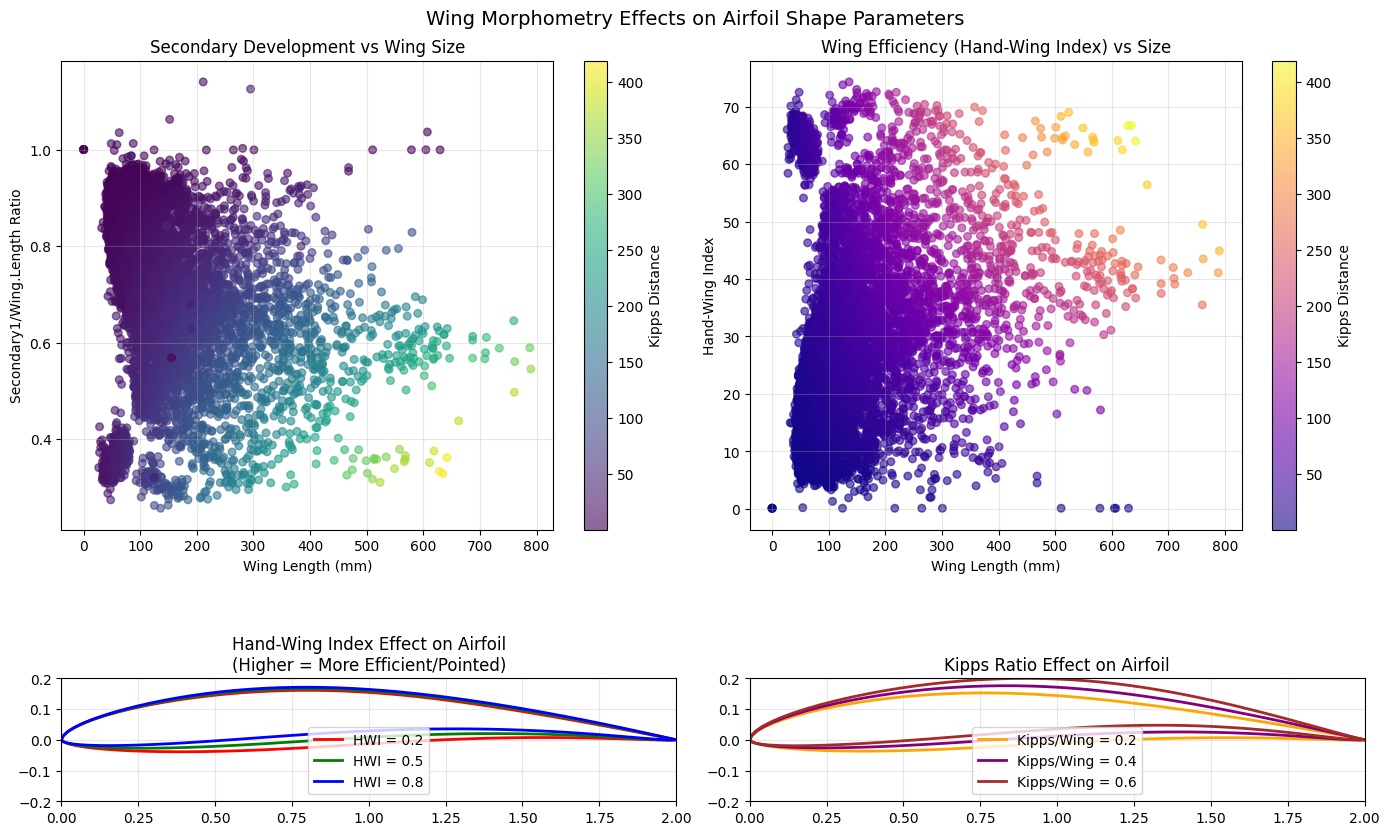


Exporting 3 representative airfoil coordinate files...
Saved: airfoil_Accipiter_albogularis_WL235.dat
Saved: airfoil_Accipiter_badius_WL187.dat
Saved: airfoil_Accipiter_bicolor_WL230.dat

=== Analysis Complete ===
Ready for integration with your RL framework!


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class BirdAirfoilGenerator:
    def __init__(self):
        self.fig, self.axes = plt.subplots(2, 3, figsize=(15, 10))
        self.fig.suptitle('Bird Wing Morphology to Airfoil Shapes using Bézier Curves\n(Based on Wing.Length, Secondary1, Kipps.Distance)', fontsize=14)
        
    def load_and_process_data(self, csv_path="../Data/AVONET_BIRDLIFE.csv"):
        """Load and process AVONET bird data using exact column names"""
        try:
            df = pd.read_csv(csv_path, encoding='ISO-8859-1')
            print(f"Successfully loaded AVONET data with {len(df)} species")
        except Exception as e:
            print(f"Could not load CSV file: {e}")
            print("Creating sample data based on AVONET structure...")
            df = self.create_sample_avonet_data()
        
        # Use exact column names from your dataset
        required_cols = ['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length','Hand-Wing.Index']
        
        # Check which columns exist
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            print(f"Missing columns: {missing_cols}")
            return self.create_sample_avonet_data()
        
        # Extract the key morphological measurements
        df_clean = df[required_cols].dropna()
        print(f"Using {len(df_clean)} birds with complete morphological data")
        
        # Display some sample species for reference
        print("\nSample species in dataset:")
        print(df_clean[['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance','Hand-Wing.Index','Tail.Length']].head(10))
        
        # Normalize the morphological measurements for airfoil generation
        scaler = MinMaxScaler()
        features = ['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length','Hand-Wing.Index']
        normalized = scaler.fit_transform(df_clean[features])
        normalized_df = pd.DataFrame(normalized, columns=features)
        
        # Add species names for reference
        normalized_df['species'] = df_clean['species'].reset_index(drop=True)
        
        return normalized_df, df_clean, scaler
    
    def create_sample_avonet_data(self):
        """Create sample data matching AVONET structure with realistic bird morphology"""
        np.random.seed(42)
        
        # Define realistic bird types with their morphological characteristics
        bird_types = [
            # [species_name, wing_length, secondary1, kipps_distance, tail_length]
            ("Trochilus_colubris", 45, 25, 20, 15),  # Ruby-throated Hummingbird
            ("Tachycineta_bicolor", 112, 68, 44, 58),  # Tree Swallow  
            ("Turdus_migratorius", 130, 85, 45, 95),  # American Robin
            ("Accipiter_striatus", 165, 95, 70, 140),  # Sharp-shinned Hawk
            ("Buteo_jamaicensis", 380, 220, 160, 190),  # Red-tailed Hawk
            ("Corvus_brachyrhynchos", 270, 180, 90, 175),  # American Crow
            ("Diomedea_exulans", 630, 280, 350, 200),  # Wandering Albatross
            ("Falco_peregrinus", 290, 165, 125, 150),  # Peregrine Falcon
            ("Apus_apus", 165, 85, 80, 75),  # Common Swift
            ("Colibri_thalassinus", 52, 28, 24, 25),  # Green Violet-ear
        ]
        
        # Expand dataset with variations
        expanded_data = []
        for i, (base_species, wl, s1, kd, tl) in enumerate(bird_types):
            for j in range(10):  # Create 10 variations of each type
                variation = np.random.normal(1.0, 0.15)  # 15% variation
                # Add Hand-Wing.Index (typically 20-60 range)
                hand_wing_base = 30 + (kd/wl) * 25  # Relate to pointedness
                expanded_data.append({
                    'species': f"{base_species}_var{j+1}",
                    'Wing.Length': max(20, wl * variation),
                    'Secondary1': max(10, s1 * variation),
                    'Kipps.Distance': max(5, kd * variation),
                    'Hand-Wing.Index': max(15, hand_wing_base * variation),
                    'Tail.Length': max(10, tl * variation)
                })
        
        return pd.DataFrame(expanded_data)
    
    def bezier_curve(self, control_points, num_points=100):
        """Generate Bézier curve from control points"""
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                binomial_coeff = comb(n, j)
                term = binomial_coeff * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += term * control_points[j]
        
        return curve
    
    def generate_airfoil_from_wing_measurements(self, wing_length, secondary1, kipps_distance, hand_wing_index, tail_length):
        """
        Generate airfoil control points based on AVONET wing measurements
        
        Parameters from your morphological diagram:
        - wing_length: Total wing length (measurement 6 in diagram)
        - secondary1: Length of longest secondary feather (measurement 7)  
        - kipps_distance: Wing tip to secondary tip distance (measurement 8)
        - hand_wing_index: Primary feather projection index (relates to wing tip shape)
        - tail_length: Tail length (affects trailing edge)
        """
        
        chord_length = 2.0  # Base chord for visualization
        
        # Calculate morphological ratios (key for airfoil shape)
        secondary_ratio = secondary1 / wing_length if wing_length > 0 else 0.6
        kipps_ratio = kipps_distance / wing_length if wing_length > 0 else 0.3
        wing_pointedness = kipps_ratio  # Higher Kipp's = more pointed wing
        hand_wing_ratio = hand_wing_index  # Normalized hand-wing index
        
        # Airfoil characteristics based on wing morphology:
        
        # 1. Thickness influenced by secondary feather development AND hand-wing index
        # Longer secondaries relative to wing = broader, thicker airfoil
        # Higher hand-wing index = thinner, more efficient airfoil for speed
        max_thickness = 0.06 + secondary_ratio * 0.10 - hand_wing_ratio * 0.04
        max_thickness = max(0.03, max_thickness)  # Minimum thickness
        
        # 2. Camber influenced by wing loading and flight style
        # Higher Kipp's distance suggests fast, efficient flight = more camber
        # Higher hand-wing index also increases camber for efficiency
        camber = 0.015 + kipps_ratio * 0.08 + hand_wing_ratio * 0.06
        
        # 3. Leading edge shape from wing pointedness AND hand-wing characteristics
        # More pointed wings (high Kipp's) = sharper leading edge
        # Higher hand-wing index = even sharper leading edge for cutting through air
        leading_edge_radius = 0.025 - kipps_ratio * 0.015 - hand_wing_ratio * 0.01
        leading_edge_radius = max(0.003, leading_edge_radius)
        
        # 4. Thickness distribution based on secondary arrangement and hand-wing index
        # Well-developed secondaries = thickness further back
        # High hand-wing index = thickness more forward (efficient design)
        max_thickness_position = 0.25 + secondary_ratio * 0.20 - hand_wing_ratio * 0.10
        max_thickness_position = np.clip(max_thickness_position, 0.15, 0.45)
        
        # 5. Camber distribution influenced by hand-wing characteristics
        # High hand-wing index moves max camber forward for efficiency
        max_camber_position = 0.30 + kipps_ratio * 0.15 - hand_wing_ratio * 0.08
        max_camber_position = np.clip(max_camber_position, 0.20, 0.50)
        
        # 6. Trailing edge from tail development
        # Longer tails suggest more gradual trailing edge
        trailing_edge_angle = max(0.002, 0.02 * (1 - tail_length))
        
        # Generate upper surface control points
        upper_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius, max_thickness * 0.8],  # Leading edge curvature
            [max_thickness_position, camber + max_thickness],  # Max thickness region
            [max_camber_position + 0.1, camber + max_thickness * 0.7],  # Post-camber
            [0.7, camber + max_thickness * 0.3],  # Rear section
            [0.95, trailing_edge_angle * 2],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Generate lower surface control points  
        lower_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius * 0.8, -max_thickness * 0.4],  # Leading edge curvature
            [max_thickness_position, camber - max_thickness * 0.9],  # Max thickness region
            [max_camber_position + 0.1, camber - max_thickness * 0.5],  # Post-camber
            [0.7, camber - max_thickness * 0.2],  # Rear section
            [0.95, -trailing_edge_angle],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Scale by chord length
        upper_cp[:, 0] *= chord_length
        lower_cp[:, 0] *= chord_length
        
        return upper_cp, lower_cp
    
    def plot_bird_airfoil_family(self, normalized_df, original_df):
        """Plot airfoils representing different bird wing morphologies"""
        
        # Select 6 birds representing different morphological types
        n_birds = len(normalized_df)
        if n_birds < 6:
            indices = list(range(n_birds))
        else:
            # Select birds with diverse morphology
            indices = [
                0,  # First bird
                n_birds // 6,  # Small wing type
                n_birds // 3,  # Medium wing type  
                n_birds // 2,  # Another type
                2 * n_birds // 3,  # Large wing type
                n_birds - 1  # Last bird
            ]
        
        for plot_idx, bird_idx in enumerate(indices):
            if plot_idx >= 6:
                break
                
            row = plot_idx // 3
            col = plot_idx % 3
            ax = self.axes[row, col]
            
            # Get bird data
            bird_norm = normalized_df.iloc[bird_idx]
            bird_orig = original_df.iloc[bird_idx]
            
            wing_length = bird_norm['Wing.Length']
            secondary1 = bird_norm['Secondary1'] 
            kipps_distance = bird_norm['Kipps.Distance']
            hand_wing_index = bird_norm['Hand-Wing.Index']
            tail_length = bird_norm['Tail.Length']
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                wing_length, secondary1, kipps_distance, hand_wing_index, tail_length
            )
            
            # Generate Bézier curves
            upper_curve = self.bezier_curve(upper_cp, 150)
            lower_curve = self.bezier_curve(lower_cp, 150)
            
            # Plot airfoil
            ax.plot(upper_curve[:, 0], upper_curve[:, 1], 'b-', linewidth=2.5, label='Upper surface')
            ax.plot(lower_curve[:, 0], lower_curve[:, 1], 'r-', linewidth=2.5, label='Lower surface')
            
            # Plot control points for reference
            ax.plot(upper_cp[:, 0], upper_cp[:, 1], 'bo--', alpha=0.4, markersize=3)
            ax.plot(lower_cp[:, 0], lower_cp[:, 1], 'ro--', alpha=0.4, markersize=3)
            
            # Fill airfoil
            all_x = np.concatenate([upper_curve[:, 0], lower_curve[::-1, 0]])
            all_y = np.concatenate([upper_curve[:, 1], lower_curve[::-1, 1]])
            ax.fill(all_x, all_y, alpha=0.2, color='lightblue')
            
            # Calculate ratios for display
            sec_ratio = bird_orig['Secondary1'] / bird_orig['Wing.Length']
            kipps_ratio = bird_orig['Kipps.Distance'] / bird_orig['Wing.Length']
            
            # Formatting
            ax.set_xlim(-0.1, 2.1)
            ax.set_ylim(-0.3, 0.3)
            ax.set_aspect('equal')
            ax.grid(True, alpha=0.3)
            
            # Species name and measurements
            species_name = bird_orig['species'][:15] + "..." if len(bird_orig['species']) > 15 else bird_orig['species']
            title = f"{species_name}\n"
            title += f"WL={bird_orig['Wing.Length']:.0f}, HWI={bird_orig['Hand-Wing.Index']:.0f}\n"
            title += f"KD={bird_orig['Kipps.Distance']:.0f}, S1={bird_orig['Secondary1']:.0f}"
            
            ax.set_title(title, fontsize=9)
            ax.set_xlabel('Chord position', fontsize=8)
            ax.set_ylabel('Thickness', fontsize=8)
            
            if plot_idx == 0:
                ax.legend(fontsize=8)
        
        plt.tight_layout()
        return self.fig
    
    def analyze_morphometric_relationships(self, normalized_df, original_df):
        """Analyze relationships between wing measurements and airfoil characteristics"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Wing Morphometry Effects on Airfoil Shape Parameters', fontsize=14)
        
        # Calculate morphological ratios including Hand-Wing Index
        original_df = original_df.copy()
        original_df['Secondary_Ratio'] = original_df['Secondary1'] / original_df['Wing.Length']
        original_df['Kipps_Ratio'] = original_df['Kipps.Distance'] / original_df['Wing.Length']
        original_df['Hand_Wing_Index'] = original_df['Hand-Wing.Index']  # Already a ratio/index
        original_df['Aspect_Estimate'] = original_df['Wing.Length'] ** 2 / (original_df['Wing.Length'] * original_df['Secondary1'])
        
        # Plot 1: Secondary ratio vs wing length
        ax1 = axes[0, 0]
        scatter = ax1.scatter(original_df['Wing.Length'], original_df['Secondary_Ratio'], 
                            c=original_df['Kipps.Distance'], cmap='viridis', alpha=0.6, s=30)
        ax1.set_xlabel('Wing Length (mm)')
        ax1.set_ylabel('Secondary1/Wing.Length Ratio')
        ax1.set_title('Secondary Development vs Wing Size')
        plt.colorbar(scatter, ax=ax1, label='Kipps Distance')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Hand-Wing Index vs wing length  
        ax2 = axes[0, 1]
        scatter2 = ax2.scatter(original_df['Wing.Length'], original_df['Hand_Wing_Index'],
                             c=original_df['Kipps.Distance'], cmap='plasma', alpha=0.6, s=30)
        ax2.set_xlabel('Wing Length (mm)')
        ax2.set_ylabel('Hand-Wing Index')
        ax2.set_title('Wing Efficiency (Hand-Wing Index) vs Size')
        plt.colorbar(scatter2, ax=ax2, label='Kipps Distance')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Demonstrate Hand-Wing Index effect on airfoil
        ax3 = axes[1, 0]
        # Show how different Hand-Wing Index values affect airfoil shape
        hwi_values = [0.2, 0.5, 0.8]  # Low, medium, high efficiency
        colors = ['red', 'green', 'blue']
        for i, hwi in enumerate(hwi_values):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, 0.3, hwi, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax3.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2, 
                    label=f'HWI = {hwi}')
            ax3.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax3.set_xlim(0, 2)
        ax3.set_ylim(-0.2, 0.2)
        ax3.set_title('Hand-Wing Index Effect on Airfoil\n(Higher = More Efficient/Pointed)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_aspect('equal')
        
        # Plot 4: Kipp's distance effect
        ax4 = axes[1, 1]
        kipps_ratios = [0.2, 0.4, 0.6]
        colors = ['orange', 'purple', 'brown']
        for i, kipps_ratio in enumerate(kipps_ratios):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, kipps_ratio, 0.4, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax4.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2,
                    label=f'Kipps/Wing = {kipps_ratio}')
            ax4.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax4.set_xlim(0, 2)
        ax4.set_ylim(-0.2, 0.2)
        ax4.set_title('Kipps Ratio Effect on Airfoil')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_aspect('equal')
        
        plt.tight_layout()
        return fig
        
    def export_airfoil_coordinates(self, normalized_df, original_df, num_export=5):
        """Export airfoil coordinates for CFD analysis"""
        
        print(f"\nExporting {num_export} representative airfoil coordinate files...")
        
        for i in range(min(num_export, len(normalized_df))):
            bird_norm = normalized_df.iloc[i]
            bird_orig = original_df.iloc[i]
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                bird_norm['Wing.Length'], bird_norm['Secondary1'], 
                bird_norm['Kipps.Distance'], bird_norm['Hand-Wing.Index'], 
                bird_norm['Tail.Length']
            )
            
            # Generate high-resolution curves for CFD
            upper_curve = self.bezier_curve(upper_cp, 200)
            lower_curve = self.bezier_curve(lower_cp, 200)
            
            # Combine upper and lower surfaces (clockwise from trailing edge)
            airfoil_coords = np.vstack([
                upper_curve,
                lower_curve[::-1]  # Reverse lower surface
            ])
            
            # Save coordinates
            species_name = bird_orig['species'].replace(' ', '_').replace('/', '_')[:30]
            filename = f'airfoil_{species_name}_WL{bird_orig["Wing.Length"]:.0f}.dat'
            
            header = f"""# Bird-inspired airfoil: {bird_orig['species']}
# Wing.Length: {bird_orig['Wing.Length']:.1f} mm
# Secondary1: {bird_orig['Secondary1']:.1f} mm  
# Kipps.Distance: {bird_orig['Kipps.Distance']:.1f} mm
# Hand-Wing.Index: {bird_orig['Hand-Wing.Index']:.1f}
# Coordinates: x, y (normalized chord)"""
            
            np.savetxt(filename, airfoil_coords, header=header, fmt='%.6f', delimiter=' ')
            print(f"Saved: {filename}")


def main():
    """Main execution function"""
    print("=== Bird Wing Morphology to Airfoil Shape Generator ===")
    print("Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance\n")
    
    # Initialize generator
    generator = BirdAirfoilGenerator()
    
    # Load and process data
    try:
        normalized_df, original_df, scaler = generator.load_and_process_data()
        print(f"\nSuccessfully processed {len(normalized_df)} bird species")
        
        # Display morphological statistics
        print("\n=== Morphological Statistics (Original Units) ===")
        print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']].describe())
        
        # Generate airfoil family
        print("\n=== Generating Bird-Inspired Airfoil Shapes ===")
        fig1 = generator.plot_bird_airfoil_family(normalized_df, original_df)
        plt.show()
        
        # Analyze morphometric relationships
        print("\n=== Analyzing Wing Morphometry Effects ===")
        fig2 = generator.analyze_morphometric_relationships(normalized_df, original_df)
        plt.show()
        
        # Export airfoil coordinates for CFD
        generator.export_airfoil_coordinates(normalized_df, original_df, num_export=3)
        
        print("\n=== Analysis Complete ===")
        print("Ready for integration with your RL framework!")
        
    except Exception as e:
        print(f"Error in main execution: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

# after hand index 2

=== Bird Wing Morphology to Airfoil Shape Generator ===
Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance

Successfully loaded AVONET data with 11009 species
Available columns: ['species', 'Genus', 'Family', 'Order', 'Beak.Length_Culmen', 'Beak.Length_Nares', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length', 'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index', 'Tail.Length', 'Mass', 'Mass.Source', 'Inference', 'Habitat', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle']
Looking for: Wing.Length, Secondary1, Kipps.Distance, Hand-Wing.Index, Tail.Length
Using 11009 birds with complete morphological data

Sample species in dataset:
                   species  Wing.Length  Secondary1  Kipps.Distance  \
0    Accipiter_albogularis        235.2       159.5            81.8   
1         Accipiter_badius        186.7       127.4            62.5   
2        Accipiter_bicolor        229.6       174.8            56.6   
3     Accipiter_brachyurus        202.2       138

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Hand-Wing.Index'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/var/folders/vj/sqc4hws93nz6rfgttr2w1fz40000gn/T/ipykernel_24632/3017191076.py", line 403, in main
    fig1 = generator.plot_bird_airfoil_family(normalized_df, original_df)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

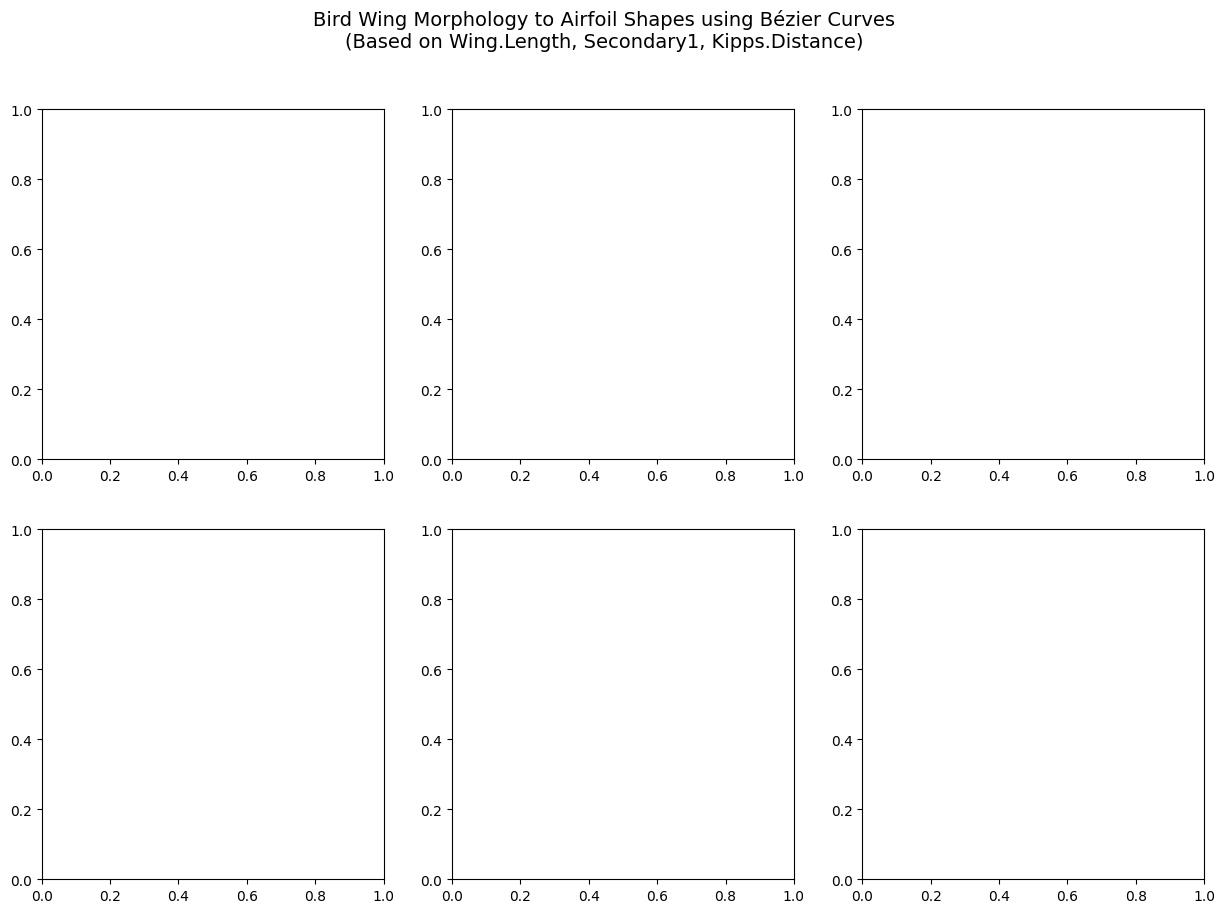

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class BirdAirfoilGenerator:
    def __init__(self):
        self.fig, self.axes = plt.subplots(2, 3, figsize=(15, 10))
        self.fig.suptitle('Bird Wing Morphology to Airfoil Shapes using Bézier Curves\n(Based on Wing.Length, Secondary1, Kipps.Distance)', fontsize=14)
        
    def load_and_process_data(self, csv_path="../Data/AVONET_BIRDLIFE.csv"):
        """Load and process AVONET bird data using exact column names"""
        try:
            df = pd.read_csv(csv_path, encoding='ISO-8859-1')
            print(f"Successfully loaded AVONET data with {len(df)} species")
            
            # Debug: Check what columns are actually in the dataset
            print(f"Available columns: {list(df.columns)}")
            print(f"Looking for: Wing.Length, Secondary1, Kipps.Distance, Hand-Wing.Index, Tail.Length")
            
        except Exception as e:
            print(f"Could not load CSV file: {e}")
            print("Creating sample data based on AVONET structure...")
            df = self.create_sample_avonet_data()
        
        # Use exact column names from your dataset
        required_cols = ['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length','Hand-Wing.Index']
        
        # Check which columns exist
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            print(f"Missing columns: {missing_cols}")
            return self.create_sample_avonet_data()
        
        # Extract the key morphological measurements
        df_clean = df[required_cols].dropna()
        print(f"Using {len(df_clean)} birds with complete morphological data")
        
        # Display some sample species for reference
        print("\nSample species in dataset:")
        print(df_clean[['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance','Hand-Wing.Index']].head(10))
        
        # Normalize the morphological measurements for airfoil generation
        scaler = MinMaxScaler()
        features = ['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']
        normalized = scaler.fit_transform(df_clean[features])
        normalized_df = pd.DataFrame(normalized, columns=features)
        
        # Add species names for reference
        normalized_df['species'] = df_clean['species'].reset_index(drop=True)
        
        return normalized_df, df_clean, scaler
    
    def create_sample_avonet_data(self):
        """Create sample data matching AVONET structure with realistic bird morphology"""
        np.random.seed(42)
        
        # Define realistic bird types with their morphological characteristics
        bird_types = [
            # [species_name, wing_length, secondary1, kipps_distance, tail_length]
            ("Trochilus_colubris", 45, 25, 20, 15),  # Ruby-throated Hummingbird
            ("Tachycineta_bicolor", 112, 68, 44, 58),  # Tree Swallow  
            ("Turdus_migratorius", 130, 85, 45, 95),  # American Robin
            ("Accipiter_striatus", 165, 95, 70, 140),  # Sharp-shinned Hawk
            ("Buteo_jamaicensis", 380, 220, 160, 190),  # Red-tailed Hawk
            ("Corvus_brachyrhynchos", 270, 180, 90, 175),  # American Crow
            ("Diomedea_exulans", 630, 280, 350, 200),  # Wandering Albatross
            ("Falco_peregrinus", 290, 165, 125, 150),  # Peregrine Falcon
            ("Apus_apus", 165, 85, 80, 75),  # Common Swift
            ("Colibri_thalassinus", 52, 28, 24, 25),  # Green Violet-ear
        ]
        
        # Expand dataset with variations
        expanded_data = []
        for i, (base_species, wl, s1, kd, tl) in enumerate(bird_types):
            for j in range(10):  # Create 10 variations of each type
                variation = np.random.normal(1.0, 0.15)  # 15% variation
                # Add Hand-Wing.Index (typically 20-60 range)
                hand_wing_base = 30 + (kd/wl) * 25  # Relate to pointedness
                expanded_data.append({
                    'species': f"{base_species}_var{j+1}",
                    'Wing.Length': max(20, wl * variation),
                    'Secondary1': max(10, s1 * variation),
                    'Kipps.Distance': max(5, kd * variation),
                    'Hand-Wing.Index': max(15, hand_wing_base * variation),
                    'Tail.Length': max(10, tl * variation)
                })
        
        return pd.DataFrame(expanded_data)
    
    def bezier_curve(self, control_points, num_points=100):
        """Generate Bézier curve from control points"""
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                binomial_coeff = comb(n, j)
                term = binomial_coeff * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += term * control_points[j]
        
        return curve
    
    def generate_airfoil_from_wing_measurements(self, wing_length, secondary1, kipps_distance, hand_wing_index, tail_length):
        """
        Generate airfoil control points based on AVONET wing measurements
        
        Parameters from your morphological diagram:
        - wing_length: Total wing length (measurement 6 in diagram)
        - secondary1: Length of longest secondary feather (measurement 7)  
        - kipps_distance: Wing tip to secondary tip distance (measurement 8)
        - hand_wing_index: Primary feather projection index (relates to wing tip shape)
        - tail_length: Tail length (affects trailing edge)
        """
        
        chord_length = 2.0  # Base chord for visualization
        
        # Calculate morphological ratios (key for airfoil shape)
        secondary_ratio = secondary1 / wing_length if wing_length > 0 else 0.6
        kipps_ratio = kipps_distance / wing_length if wing_length > 0 else 0.3
        wing_pointedness = kipps_ratio  # Higher Kipp's = more pointed wing
        hand_wing_ratio = hand_wing_index  # Normalized hand-wing index
        
        # Airfoil characteristics based on wing morphology:
        
        # 1. Thickness influenced by secondary feather development AND hand-wing index
        # Longer secondaries relative to wing = broader, thicker airfoil
        # Higher hand-wing index = thinner, more efficient airfoil for speed
        max_thickness = 0.06 + secondary_ratio * 0.10 - hand_wing_ratio * 0.04
        max_thickness = max(0.03, max_thickness)  # Minimum thickness
        
        # 2. Camber influenced by wing loading and flight style
        # Higher Kipp's distance suggests fast, efficient flight = more camber
        # Higher hand-wing index also increases camber for efficiency
        camber = 0.015 + kipps_ratio * 0.08 + hand_wing_ratio * 0.06
        
        # 3. Leading edge shape from wing pointedness AND hand-wing characteristics
        # More pointed wings (high Kipp's) = sharper leading edge
        # Higher hand-wing index = even sharper leading edge for cutting through air
        leading_edge_radius = 0.025 - kipps_ratio * 0.015 - hand_wing_ratio * 0.01
        leading_edge_radius = max(0.003, leading_edge_radius)
        
        # 4. Thickness distribution based on secondary arrangement and hand-wing index
        # Well-developed secondaries = thickness further back
        # High hand-wing index = thickness more forward (efficient design)
        max_thickness_position = 0.25 + secondary_ratio * 0.20 - hand_wing_ratio * 0.10
        max_thickness_position = np.clip(max_thickness_position, 0.15, 0.45)
        
        # 5. Camber distribution influenced by hand-wing characteristics
        # High hand-wing index moves max camber forward for efficiency
        max_camber_position = 0.30 + kipps_ratio * 0.15 - hand_wing_ratio * 0.08
        max_camber_position = np.clip(max_camber_position, 0.20, 0.50)
        
        # 6. Trailing edge from tail development
        # Longer tails suggest more gradual trailing edge
        trailing_edge_angle = max(0.002, 0.02 * (1 - tail_length))
        
        # Generate upper surface control points
        upper_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius, max_thickness * 0.8],  # Leading edge curvature
            [max_thickness_position, camber + max_thickness],  # Max thickness region
            [max_camber_position + 0.1, camber + max_thickness * 0.7],  # Post-camber
            [0.7, camber + max_thickness * 0.3],  # Rear section
            [0.95, trailing_edge_angle * 2],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Generate lower surface control points  
        lower_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius * 0.8, -max_thickness * 0.4],  # Leading edge curvature
            [max_thickness_position, camber - max_thickness * 0.9],  # Max thickness region
            [max_camber_position + 0.1, camber - max_thickness * 0.5],  # Post-camber
            [0.7, camber - max_thickness * 0.2],  # Rear section
            [0.95, -trailing_edge_angle],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Scale by chord length
        upper_cp[:, 0] *= chord_length
        lower_cp[:, 0] *= chord_length
        
        return upper_cp, lower_cp
    
    def plot_bird_airfoil_family(self, normalized_df, original_df):
        """Plot airfoils representing different bird wing morphologies"""
        
        # Select 6 birds representing different morphological types
        n_birds = len(normalized_df)
        if n_birds < 6:
            indices = list(range(n_birds))
        else:
            # Select birds with diverse morphology
            indices = [
                0,  # First bird
                n_birds // 6,  # Small wing type
                n_birds // 3,  # Medium wing type  
                n_birds // 2,  # Another type
                2 * n_birds // 3,  # Large wing type
                n_birds - 1  # Last bird
            ]
        
        for plot_idx, bird_idx in enumerate(indices):
            if plot_idx >= 6:
                break
                
            row = plot_idx // 3
            col = plot_idx % 3
            ax = self.axes[row, col]
            
            # Get bird data
            bird_norm = normalized_df.iloc[bird_idx]
            bird_orig = original_df.iloc[bird_idx]
            
            wing_length = bird_norm['Wing.Length']
            secondary1 = bird_norm['Secondary1'] 
            kipps_distance = bird_norm['Kipps.Distance']
            hand_wing_index = bird_norm['Hand-Wing.Index']
            tail_length = bird_norm['Tail.Length']
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                wing_length, secondary1, kipps_distance, hand_wing_index, tail_length
            )
            
            # Generate Bézier curves
            upper_curve = self.bezier_curve(upper_cp, 150)
            lower_curve = self.bezier_curve(lower_cp, 150)
            
            # Plot airfoil
            ax.plot(upper_curve[:, 0], upper_curve[:, 1], 'b-', linewidth=2.5, label='Upper surface')
            ax.plot(lower_curve[:, 0], lower_curve[:, 1], 'r-', linewidth=2.5, label='Lower surface')
            
            # Plot control points for reference
            ax.plot(upper_cp[:, 0], upper_cp[:, 1], 'bo--', alpha=0.4, markersize=3)
            ax.plot(lower_cp[:, 0], lower_cp[:, 1], 'ro--', alpha=0.4, markersize=3)
            
            # Fill airfoil
            all_x = np.concatenate([upper_curve[:, 0], lower_curve[::-1, 0]])
            all_y = np.concatenate([upper_curve[:, 1], lower_curve[::-1, 1]])
            ax.fill(all_x, all_y, alpha=0.2, color='lightblue')
            
            # Calculate ratios for display
            sec_ratio = bird_orig['Secondary1'] / bird_orig['Wing.Length']
            kipps_ratio = bird_orig['Kipps.Distance'] / bird_orig['Wing.Length']
            
            # Formatting
            ax.set_xlim(-0.1, 2.1)
            ax.set_ylim(-0.3, 0.3)
            ax.set_aspect('equal')
            ax.grid(True, alpha=0.3)
            
            # Species name and measurements
            species_name = bird_orig['species'][:15] + "..." if len(bird_orig['species']) > 15 else bird_orig['species']
            title = f"{species_name}\n"
            title += f"WL={bird_orig['Wing.Length']:.0f}, HWI={bird_orig['Hand-Wing.Index']:.0f}\n"
            title += f"KD={bird_orig['Kipps.Distance']:.0f}, S1={bird_orig['Secondary1']:.0f}"
            
            ax.set_title(title, fontsize=9)
            ax.set_xlabel('Chord position', fontsize=8)
            ax.set_ylabel('Thickness', fontsize=8)
            
            if plot_idx == 0:
                ax.legend(fontsize=8)
        
        plt.tight_layout()
        return self.fig
    
    def analyze_morphometric_relationships(self, normalized_df, original_df):
        """Analyze relationships between wing measurements and airfoil characteristics"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Wing Morphometry Effects on Airfoil Shape Parameters', fontsize=14)
        
        # Calculate morphological ratios including Hand-Wing Index
        original_df = original_df.copy()
        original_df['Secondary_Ratio'] = original_df['Secondary1'] / original_df['Wing.Length']
        original_df['Kipps_Ratio'] = original_df['Kipps.Distance'] / original_df['Wing.Length']
        original_df['Hand_Wing_Index'] = original_df['Hand-Wing.Index']  # Already a ratio/index
        original_df['Aspect_Estimate'] = original_df['Wing.Length'] ** 2 / (original_df['Wing.Length'] * original_df['Secondary1'])
        
        # Plot 1: Secondary ratio vs wing length
        ax1 = axes[0, 0]
        scatter = ax1.scatter(original_df['Wing.Length'], original_df['Secondary_Ratio'], 
                            c=original_df['Kipps.Distance'], cmap='viridis', alpha=0.6, s=30)
        ax1.set_xlabel('Wing Length (mm)')
        ax1.set_ylabel('Secondary1/Wing.Length Ratio')
        ax1.set_title('Secondary Development vs Wing Size')
        plt.colorbar(scatter, ax=ax1, label='Kipps Distance')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Hand-Wing Index vs wing length  
        ax2 = axes[0, 1]
        scatter2 = ax2.scatter(original_df['Wing.Length'], original_df['Hand_Wing_Index'],
                             c=original_df['Kipps.Distance'], cmap='plasma', alpha=0.6, s=30)
        ax2.set_xlabel('Wing Length (mm)')
        ax2.set_ylabel('Hand-Wing Index')
        ax2.set_title('Wing Efficiency (Hand-Wing Index) vs Size')
        plt.colorbar(scatter2, ax=ax2, label='Kipps Distance')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Demonstrate Hand-Wing Index effect on airfoil
        ax3 = axes[1, 0]
        # Show how different Hand-Wing Index values affect airfoil shape
        hwi_values = [0.2, 0.5, 0.8]  # Low, medium, high efficiency
        colors = ['red', 'green', 'blue']
        for i, hwi in enumerate(hwi_values):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, 0.3, hwi, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax3.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2, 
                    label=f'HWI = {hwi}')
            ax3.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax3.set_xlim(0, 2)
        ax3.set_ylim(-0.2, 0.2)
        ax3.set_title('Hand-Wing Index Effect on Airfoil\n(Higher = More Efficient/Pointed)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_aspect('equal')
        
        # Plot 4: Kipp's distance effect
        ax4 = axes[1, 1]
        kipps_ratios = [0.2, 0.4, 0.6]
        colors = ['orange', 'purple', 'brown']
        for i, kipps_ratio in enumerate(kipps_ratios):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, kipps_ratio, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax4.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2,
                    label=f'Kipps/Wing = {kipps_ratio}')
            ax4.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax4.set_xlim(0, 2)
        ax4.set_ylim(-0.2, 0.2)
        ax4.set_title('Kipps Ratio Effect on Airfoil')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_aspect('equal')
        
        plt.tight_layout()
        return fig
        
    def export_airfoil_coordinates(self, normalized_df, original_df, num_export=5):
        """Export airfoil coordinates for CFD analysis"""
        
        print(f"\nExporting {num_export} representative airfoil coordinate files...")
        
        for i in range(min(num_export, len(normalized_df))):
            bird_norm = normalized_df.iloc[i]
            bird_orig = original_df.iloc[i]
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                bird_norm['Wing.Length'], bird_norm['Secondary1'], 
                bird_norm['Kipps.Distance'], bird_norm['Hand-Wing.Index'], bird_norm['Tail.Length']
            )
            
            # Generate high-resolution curves for CFD
            upper_curve = self.bezier_curve(upper_cp, 200)
            lower_curve = self.bezier_curve(lower_cp, 200)
            
            # Combine upper and lower surfaces (clockwise from trailing edge)
            airfoil_coords = np.vstack([
                upper_curve,
                lower_curve[::-1]  # Reverse lower surface
            ])
            
            # Save coordinates
            species_name = bird_orig['species'].replace(' ', '_').replace('/', '_')[:30]
            filename = f'airfoil_{species_name}_WL{bird_orig["Wing.Length"]:.0f}.dat'
            
            header = f"""# Bird-inspired airfoil: {bird_orig['species']}
# Wing.Length: {bird_orig['Wing.Length']:.1f} mm
# Secondary1: {bird_orig['Secondary1']:.1f} mm  
# Kipps.Distance: {bird_orig['Kipps.Distance']:.1f} mm
# Hand-Wing.Index: {bird_orig['Hand-Wing.Index']:.1f}
# Coordinates: x, y (normalized chord)"""
            
            np.savetxt(filename, airfoil_coords, header=header, fmt='%.6f', delimiter=' ')
            print(f"Saved: {filename}")

def main():
    """Main execution function"""
    print("=== Bird Wing Morphology to Airfoil Shape Generator ===")
    print("Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance\n")
    
    # Initialize generator
    generator = BirdAirfoilGenerator()
    
    # Load and process data
    try:
        normalized_df, original_df, scaler = generator.load_and_process_data()
        print(f"\nSuccessfully processed {len(normalized_df)} bird species")
        
        # Display morphological statistics
        print("\n=== Morphological Statistics (Original Units) ===")
        print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Hand-Wing.Index', 'Tail.Length']].describe())
        
        # Generate airfoil family
        print("\n=== Generating Bird-Inspired Airfoil Shapes ===")
        fig1 = generator.plot_bird_airfoil_family(normalized_df, original_df)
        plt.show()
        
        # Analyze morphometric relationships
        print("\n=== Analyzing Wing Morphometry Effects ===")
        fig2 = generator.analyze_morphometric_relationships(normalized_df, original_df)
        plt.show()
        
        # Export airfoil coordinates for CFD
        generator.export_airfoil_coordinates(normalized_df, original_df, num_export=3)
        
        print("\n=== Analysis Complete ===")
        print("Ready for integration with your RL framework!")
        
    except Exception as e:
        print(f"Error in main execution: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

# version 20


=== Bird Wing Morphology to Airfoil Shape Generator ===
Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance

Successfully loaded AVONET data with 11009 species
Available columns: ['species', 'Genus', 'Family', 'Order', 'Beak.Length_Culmen', 'Beak.Length_Nares', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length', 'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index', 'Tail.Length', 'Mass', 'Mass.Source', 'Inference', 'Habitat', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle']
Looking for: Wing.Length, Secondary1, Kipps.Distance, Hand-Wing.Index, Tail.Length
Using 11009 birds with complete morphological data

Sample species in dataset:
                   species  Wing.Length  Secondary1  Kipps.Distance
0    Accipiter_albogularis        235.2       159.5            81.8
1         Accipiter_badius        186.7       127.4            62.5
2        Accipiter_bicolor        229.6       174.8            56.6
3     Accipiter_brachyurus        202.2       138.1          

Traceback (most recent call last):
  File "/var/folders/vj/sqc4hws93nz6rfgttr2w1fz40000gn/T/ipykernel_24632/3977434150.py", line 399, in main
    print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Hand-Wing.Index', 'Tail.Length']].describe())
          ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 6252, in _raise_if_missing
    raise Key

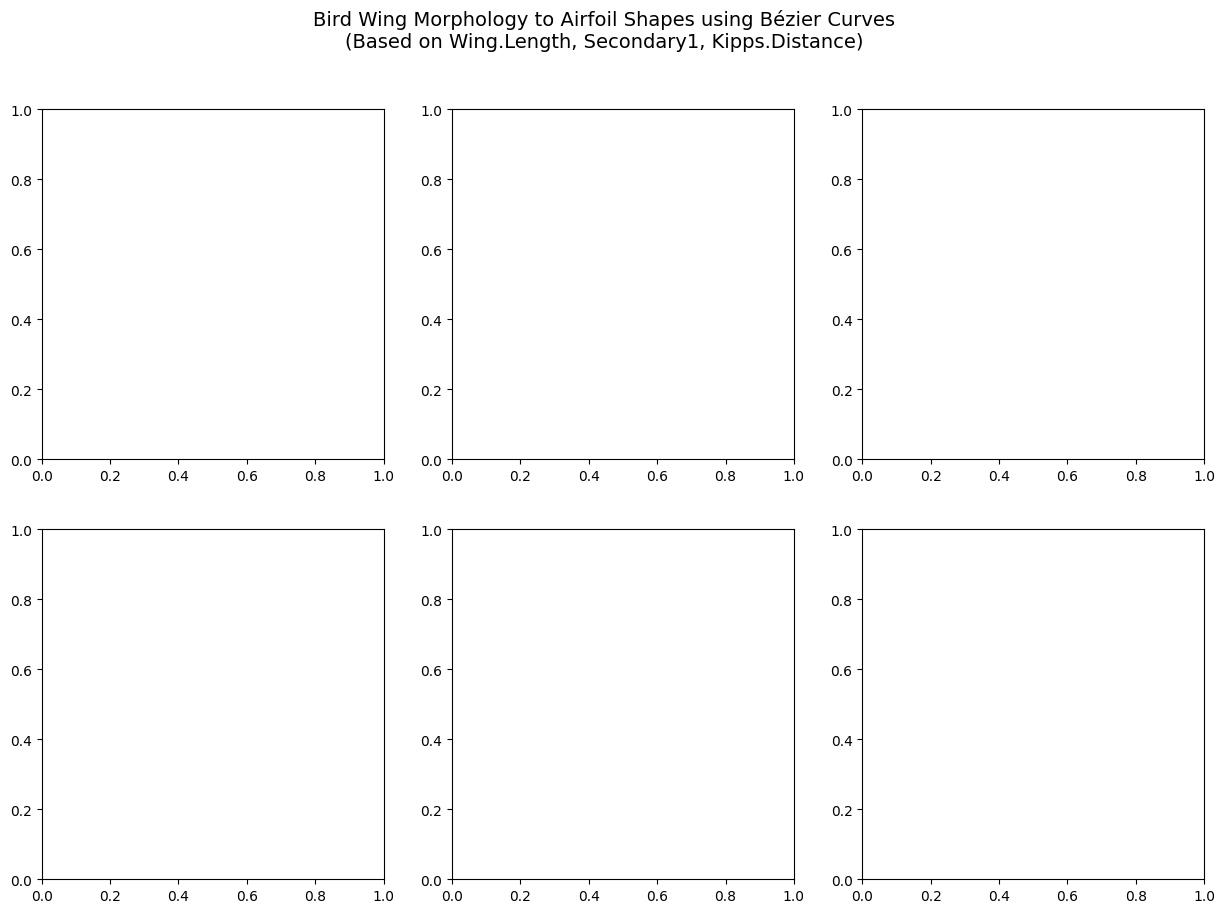

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class BirdAirfoilGenerator:
    def __init__(self):
        self.fig, self.axes = plt.subplots(2, 3, figsize=(15, 10))
        self.fig.suptitle('Bird Wing Morphology to Airfoil Shapes using Bézier Curves\n(Based on Wing.Length, Secondary1, Kipps.Distance)', fontsize=14)
        
    def load_and_process_data(self, csv_path="../Data/AVONET_BIRDLIFE.csv"):
        """Load and process AVONET bird data using exact column names"""
        try:
            df = pd.read_csv(csv_path, encoding='ISO-8859-1')
            print(f"Successfully loaded AVONET data with {len(df)} species")
            
            # Debug: Check what columns are actually in the dataset
            print(f"Available columns: {list(df.columns)}")
            print(f"Looking for: Wing.Length, Secondary1, Kipps.Distance, Hand-Wing.Index, Tail.Length")
            
        except Exception as e:
            print(f"Could not load CSV file: {e}")
            print("Creating sample data based on AVONET structure...")
            df = self.create_sample_avonet_data()
        
        # Use exact column names from your dataset
        required_cols = ['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']
        
        # Check which columns exist
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            print(f"Missing columns: {missing_cols}")
            return self.create_sample_avonet_data()
        
        # Extract the key morphological measurements
        df_clean = df[required_cols].dropna()
        print(f"Using {len(df_clean)} birds with complete morphological data")
        
        # Display some sample species for reference
        print("\nSample species in dataset:")
        print(df_clean[['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance']].head(10))
        
        # Normalize the morphological measurements for airfoil generation
        scaler = MinMaxScaler()
        features = ['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']
        normalized = scaler.fit_transform(df_clean[features])
        normalized_df = pd.DataFrame(normalized, columns=features)
        
        # Add species names for reference
        normalized_df['species'] = df_clean['species'].reset_index(drop=True)
        
        return normalized_df, df_clean, scaler
    
    def create_sample_avonet_data(self):
        """Create sample data matching AVONET structure with realistic bird morphology"""
        np.random.seed(42)
        
        # Define realistic bird types with their morphological characteristics
        bird_types = [
            # [species_name, wing_length, secondary1, kipps_distance, tail_length]
            ("Trochilus_colubris", 45, 25, 20, 15),  # Ruby-throated Hummingbird
            ("Tachycineta_bicolor", 112, 68, 44, 58),  # Tree Swallow  
            ("Turdus_migratorius", 130, 85, 45, 95),  # American Robin
            ("Accipiter_striatus", 165, 95, 70, 140),  # Sharp-shinned Hawk
            ("Buteo_jamaicensis", 380, 220, 160, 190),  # Red-tailed Hawk
            ("Corvus_brachyrhynchos", 270, 180, 90, 175),  # American Crow
            ("Diomedea_exulans", 630, 280, 350, 200),  # Wandering Albatross
            ("Falco_peregrinus", 290, 165, 125, 150),  # Peregrine Falcon
            ("Apus_apus", 165, 85, 80, 75),  # Common Swift
            ("Colibri_thalassinus", 52, 28, 24, 25),  # Green Violet-ear
        ]
        
        # Expand dataset with variations
        expanded_data = []
        for i, (base_species, wl, s1, kd, tl) in enumerate(bird_types):
            for j in range(10):  # Create 10 variations of each type
                variation = np.random.normal(1.0, 0.15)  # 15% variation
                # Add Hand-Wing.Index (typically 20-60 range)
                hand_wing_base = 30 + (kd/wl) * 25  # Relate to pointedness
                expanded_data.append({
                    'species': f"{base_species}_var{j+1}",
                    'Wing.Length': max(20, wl * variation),
                    'Secondary1': max(10, s1 * variation),
                    'Kipps.Distance': max(5, kd * variation),
                    'Hand-Wing.Index': max(15, hand_wing_base * variation),
                    'Tail.Length': max(10, tl * variation)
                })
        
        return pd.DataFrame(expanded_data)
    
    def bezier_curve(self, control_points, num_points=100):
        """Generate Bézier curve from control points"""
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                binomial_coeff = comb(n, j)
                term = binomial_coeff * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += term * control_points[j]
        
        return curve
    
    def generate_airfoil_from_wing_measurements(self, wing_length, secondary1, kipps_distance, hand_wing_index, tail_length):
        """
        Generate airfoil control points based on AVONET wing measurements
        
        Parameters from your morphological diagram:
        - wing_length: Total wing length (measurement 6 in diagram)
        - secondary1: Length of longest secondary feather (measurement 7)  
        - kipps_distance: Wing tip to secondary tip distance (measurement 8)
        - hand_wing_index: Primary feather projection index (relates to wing tip shape)
        - tail_length: Tail length (affects trailing edge)
        """
        
        chord_length = 2.0  # Base chord for visualization
        
        # Calculate morphological ratios (key for airfoil shape)
        secondary_ratio = secondary1 / wing_length if wing_length > 0 else 0.6
        kipps_ratio = kipps_distance / wing_length if wing_length > 0 else 0.3
        wing_pointedness = kipps_ratio  # Higher Kipp's = more pointed wing
        hand_wing_ratio = hand_wing_index  # Normalized hand-wing index
        
        # Airfoil characteristics based on wing morphology:
        
        # 1. Thickness influenced by secondary feather development AND hand-wing index
        # Longer secondaries relative to wing = broader, thicker airfoil
        # Higher hand-wing index = thinner, more efficient airfoil for speed
        max_thickness = 0.06 + secondary_ratio * 0.10 - hand_wing_ratio * 0.04
        max_thickness = max(0.03, max_thickness)  # Minimum thickness
        
        # 2. Camber influenced by wing loading and flight style
        # Higher Kipp's distance suggests fast, efficient flight = more camber
        # Higher hand-wing index also increases camber for efficiency
        camber = 0.015 + kipps_ratio * 0.08 + hand_wing_ratio * 0.06
        
        # 3. Leading edge shape from wing pointedness AND hand-wing characteristics
        # More pointed wings (high Kipp's) = sharper leading edge
        # Higher hand-wing index = even sharper leading edge for cutting through air
        leading_edge_radius = 0.025 - kipps_ratio * 0.015 - hand_wing_ratio * 0.01
        leading_edge_radius = max(0.003, leading_edge_radius)
        
        # 4. Thickness distribution based on secondary arrangement and hand-wing index
        # Well-developed secondaries = thickness further back
        # High hand-wing index = thickness more forward (efficient design)
        max_thickness_position = 0.25 + secondary_ratio * 0.20 - hand_wing_ratio * 0.10
        max_thickness_position = np.clip(max_thickness_position, 0.15, 0.45)
        
        # 5. Camber distribution influenced by hand-wing characteristics
        # High hand-wing index moves max camber forward for efficiency
        max_camber_position = 0.30 + kipps_ratio * 0.15 - hand_wing_ratio * 0.08
        max_camber_position = np.clip(max_camber_position, 0.20, 0.50)
        
        # 6. Trailing edge from tail development
        # Longer tails suggest more gradual trailing edge
        trailing_edge_angle = max(0.002, 0.02 * (1 - tail_length))
        
        # Generate upper surface control points
        upper_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius, max_thickness * 0.8],  # Leading edge curvature
            [max_thickness_position, camber + max_thickness],  # Max thickness region
            [max_camber_position + 0.1, camber + max_thickness * 0.7],  # Post-camber
            [0.7, camber + max_thickness * 0.3],  # Rear section
            [0.95, trailing_edge_angle * 2],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Generate lower surface control points  
        lower_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius * 0.8, -max_thickness * 0.4],  # Leading edge curvature
            [max_thickness_position, camber - max_thickness * 0.9],  # Max thickness region
            [max_camber_position + 0.1, camber - max_thickness * 0.5],  # Post-camber
            [0.7, camber - max_thickness * 0.2],  # Rear section
            [0.95, -trailing_edge_angle],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Scale by chord length
        upper_cp[:, 0] *= chord_length
        lower_cp[:, 0] *= chord_length
        
        return upper_cp, lower_cp
    
    def plot_bird_airfoil_family(self, normalized_df, original_df):
        """Plot airfoils representing different bird wing morphologies"""
        
        # Select 6 birds representing different morphological types
        n_birds = len(normalized_df)
        if n_birds < 6:
            indices = list(range(n_birds))
        else:
            # Select birds with diverse morphology
            indices = [
                0,  # First bird
                n_birds // 6,  # Small wing type
                n_birds // 3,  # Medium wing type  
                n_birds // 2,  # Another type
                2 * n_birds // 3,  # Large wing type
                n_birds - 1  # Last bird
            ]
        
        for plot_idx, bird_idx in enumerate(indices):
            if plot_idx >= 6:
                break
                
            row = plot_idx // 3
            col = plot_idx % 3
            ax = self.axes[row, col]
            
            # Get bird data
            bird_norm = normalized_df.iloc[bird_idx]
            bird_orig = original_df.iloc[bird_idx]
            
            wing_length = bird_norm['Wing.Length']
            secondary1 = bird_norm['Secondary1'] 
            kipps_distance = bird_norm['Kipps.Distance']
            hand_wing_index = bird_norm['Hand-Wing.Index']
            tail_length = bird_norm['Tail.Length']
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                wing_length, secondary1, kipps_distance, hand_wing_index, tail_length
            )
            
            # Generate Bézier curves
            upper_curve = self.bezier_curve(upper_cp, 150)
            lower_curve = self.bezier_curve(lower_cp, 150)
            
            # Plot airfoil
            ax.plot(upper_curve[:, 0], upper_curve[:, 1], 'b-', linewidth=2.5, label='Upper surface')
            ax.plot(lower_curve[:, 0], lower_curve[:, 1], 'r-', linewidth=2.5, label='Lower surface')
            
            # Plot control points for reference
            ax.plot(upper_cp[:, 0], upper_cp[:, 1], 'bo--', alpha=0.4, markersize=3)
            ax.plot(lower_cp[:, 0], lower_cp[:, 1], 'ro--', alpha=0.4, markersize=3)
            
            # Fill airfoil
            all_x = np.concatenate([upper_curve[:, 0], lower_curve[::-1, 0]])
            all_y = np.concatenate([upper_curve[:, 1], lower_curve[::-1, 1]])
            ax.fill(all_x, all_y, alpha=0.2, color='lightblue')
            
            # Calculate ratios for display
            sec_ratio = bird_orig['Secondary1'] / bird_orig['Wing.Length']
            kipps_ratio = bird_orig['Kipps.Distance'] / bird_orig['Wing.Length']
            
            # Formatting
            ax.set_xlim(-0.1, 2.1)
            ax.set_ylim(-0.3, 0.3)
            ax.set_aspect('equal')
            ax.grid(True, alpha=0.3)
            
            # Species name and measurements
            species_name = bird_orig['species'][:15] + "..." if len(bird_orig['species']) > 15 else bird_orig['species']
            title = f"{species_name}\n"
            title += f"WL={bird_orig['Wing.Length']:.0f}, HWI={bird_orig['Hand-Wing.Index']:.0f}\n"
            title += f"KD={bird_orig['Kipps.Distance']:.0f}, S1={bird_orig['Secondary1']:.0f}"
            
            ax.set_title(title, fontsize=9)
            ax.set_xlabel('Chord position', fontsize=8)
            ax.set_ylabel('Thickness', fontsize=8)
            
            if plot_idx == 0:
                ax.legend(fontsize=8)
        
        plt.tight_layout()
        return self.fig
    
    def analyze_morphometric_relationships(self, normalized_df, original_df):
        """Analyze relationships between wing measurements and airfoil characteristics"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Wing Morphometry Effects on Airfoil Shape Parameters', fontsize=14)
        
        # Calculate morphological ratios including Hand-Wing Index
        original_df = original_df.copy()
        original_df['Secondary_Ratio'] = original_df['Secondary1'] / original_df['Wing.Length']
        original_df['Kipps_Ratio'] = original_df['Kipps.Distance'] / original_df['Wing.Length']
        original_df['Hand_Wing_Index'] = original_df['Hand-Wing.Index']  # Already a ratio/index
        original_df['Aspect_Estimate'] = original_df['Wing.Length'] ** 2 / (original_df['Wing.Length'] * original_df['Secondary1'])
        
        # Plot 1: Secondary ratio vs wing length
        ax1 = axes[0, 0]
        scatter = ax1.scatter(original_df['Wing.Length'], original_df['Secondary_Ratio'], 
                            c=original_df['Kipps.Distance'], cmap='viridis', alpha=0.6, s=30)
        ax1.set_xlabel('Wing Length (mm)')
        ax1.set_ylabel('Secondary1/Wing.Length Ratio')
        ax1.set_title('Secondary Development vs Wing Size')
        plt.colorbar(scatter, ax=ax1, label='Kipps Distance')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Hand-Wing Index vs wing length  
        ax2 = axes[0, 1]
        scatter2 = ax2.scatter(original_df['Wing.Length'], original_df['Hand_Wing_Index'],
                             c=original_df['Kipps.Distance'], cmap='plasma', alpha=0.6, s=30)
        ax2.set_xlabel('Wing Length (mm)')
        ax2.set_ylabel('Hand-Wing Index')
        ax2.set_title('Wing Efficiency (Hand-Wing Index) vs Size')
        plt.colorbar(scatter2, ax=ax2, label='Kipps Distance')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Demonstrate Hand-Wing Index effect on airfoil
        ax3 = axes[1, 0]
        # Show how different Hand-Wing Index values affect airfoil shape
        hwi_values = [0.2, 0.5, 0.8]  # Low, medium, high efficiency
        colors = ['red', 'green', 'blue']
        for i, hwi in enumerate(hwi_values):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, 0.3, hwi, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax3.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2, 
                    label=f'HWI = {hwi}')
            ax3.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax3.set_xlim(0, 2)
        ax3.set_ylim(-0.2, 0.2)
        ax3.set_title('Hand-Wing Index Effect on Airfoil\n(Higher = More Efficient/Pointed)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_aspect('equal')
        
        # Plot 4: Kipp's distance effect
        ax4 = axes[1, 1]
        kipps_ratios = [0.2, 0.4, 0.6]
        colors = ['orange', 'purple', 'brown']
        for i, kipps_ratio in enumerate(kipps_ratios):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, kipps_ratio, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax4.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2,
                    label=f'Kipps/Wing = {kipps_ratio}')
            ax4.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax4.set_xlim(0, 2)
        ax4.set_ylim(-0.2, 0.2)
        ax4.set_title('Kipps Ratio Effect on Airfoil')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_aspect('equal')
        
        plt.tight_layout()
        return fig
        
    def export_airfoil_coordinates(self, normalized_df, original_df, num_export=5):
        """Export airfoil coordinates for CFD analysis"""
        
        print(f"\nExporting {num_export} representative airfoil coordinate files...")
        
        for i in range(min(num_export, len(normalized_df))):
            bird_norm = normalized_df.iloc[i]
            bird_orig = original_df.iloc[i]
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                bird_norm['Wing.Length'], bird_norm['Secondary1'], 
                bird_norm['Kipps.Distance'], bird_norm['Hand-Wing.Index'], bird_norm['Tail.Length']
            )
            
            # Generate high-resolution curves for CFD
            upper_curve = self.bezier_curve(upper_cp, 200)
            lower_curve = self.bezier_curve(lower_cp, 200)
            
            # Combine upper and lower surfaces (clockwise from trailing edge)
            airfoil_coords = np.vstack([
                upper_curve,
                lower_curve[::-1]  # Reverse lower surface
            ])
            
            # Save coordinates
            species_name = bird_orig['species'].replace(' ', '_').replace('/', '_')[:30]
            filename = f'airfoil_{species_name}_WL{bird_orig["Wing.Length"]:.0f}.dat'
            
            header = f"""# Bird-inspired airfoil: {bird_orig['species']}
# Wing.Length: {bird_orig['Wing.Length']:.1f} mm
# Secondary1: {bird_orig['Secondary1']:.1f} mm  
# Kipps.Distance: {bird_orig['Kipps.Distance']:.1f} mm
# Hand-Wing.Index: {bird_orig['Hand-Wing.Index']:.1f}
# Coordinates: x, y (normalized chord)"""
            
            np.savetxt(filename, airfoil_coords, header=header, fmt='%.6f', delimiter=' ')
            print(f"Saved: {filename}")

def main():
    """Main execution function"""
    print("=== Bird Wing Morphology to Airfoil Shape Generator ===")
    print("Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance\n")
    
    # Initialize generator
    generator = BirdAirfoilGenerator()
    
    # Load and process data
    try:
        normalized_df, original_df, scaler = generator.load_and_process_data()
        print(f"\nSuccessfully processed {len(normalized_df)} bird species")
        
        # Display morphological statistics
        print("\n=== Morphological Statistics (Original Units) ===")
        print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Hand-Wing.Index', 'Tail.Length']].describe())
        
        # Generate airfoil family
        print("\n=== Generating Bird-Inspired Airfoil Shapes ===")
        fig1 = generator.plot_bird_airfoil_family(normalized_df, original_df)
        plt.show()
        
        # Analyze morphometric relationships
        print("\n=== Analyzing Wing Morphometry Effects ===")
        fig2 = generator.analyze_morphometric_relationships(normalized_df, original_df)
        plt.show()
        
        # Export airfoil coordinates for CFD
        generator.export_airfoil_coordinates(normalized_df, original_df, num_export=3)
        
        print("\n=== Analysis Complete ===")
        print("Ready for integration with your RL framework!")
        
    except Exception as e:
        print(f"Error in main execution: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

# version 21

=== Bird Wing Morphology to Airfoil Shape Generator ===
Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance

Successfully loaded AVONET data with 11009 species
Available columns: ['species', 'Genus', 'Family', 'Order', 'Beak.Length_Culmen', 'Beak.Length_Nares', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length', 'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index', 'Tail.Length', 'Mass', 'Mass.Source', 'Inference', 'Habitat', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle']
Looking for: Wing.Length, Secondary1, Kipps.Distance, Hand-Wing.Index, Tail.Length
Using 11009 birds with complete morphological data

Sample species in dataset:
                   species  Wing.Length  Secondary1  Kipps.Distance
0    Accipiter_albogularis        235.2       159.5            81.8
1         Accipiter_badius        186.7       127.4            62.5
2        Accipiter_bicolor        229.6       174.8            56.6
3     Accipiter_brachyurus        202.2       138.1          

Traceback (most recent call last):
  File "/var/folders/vj/sqc4hws93nz6rfgttr2w1fz40000gn/T/ipykernel_24632/3798128867.py", line 405, in main
    print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Hand-Wing.Index', 'Tail.Length']].describe())
          ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 6252, in _raise_if_missing
    raise Key

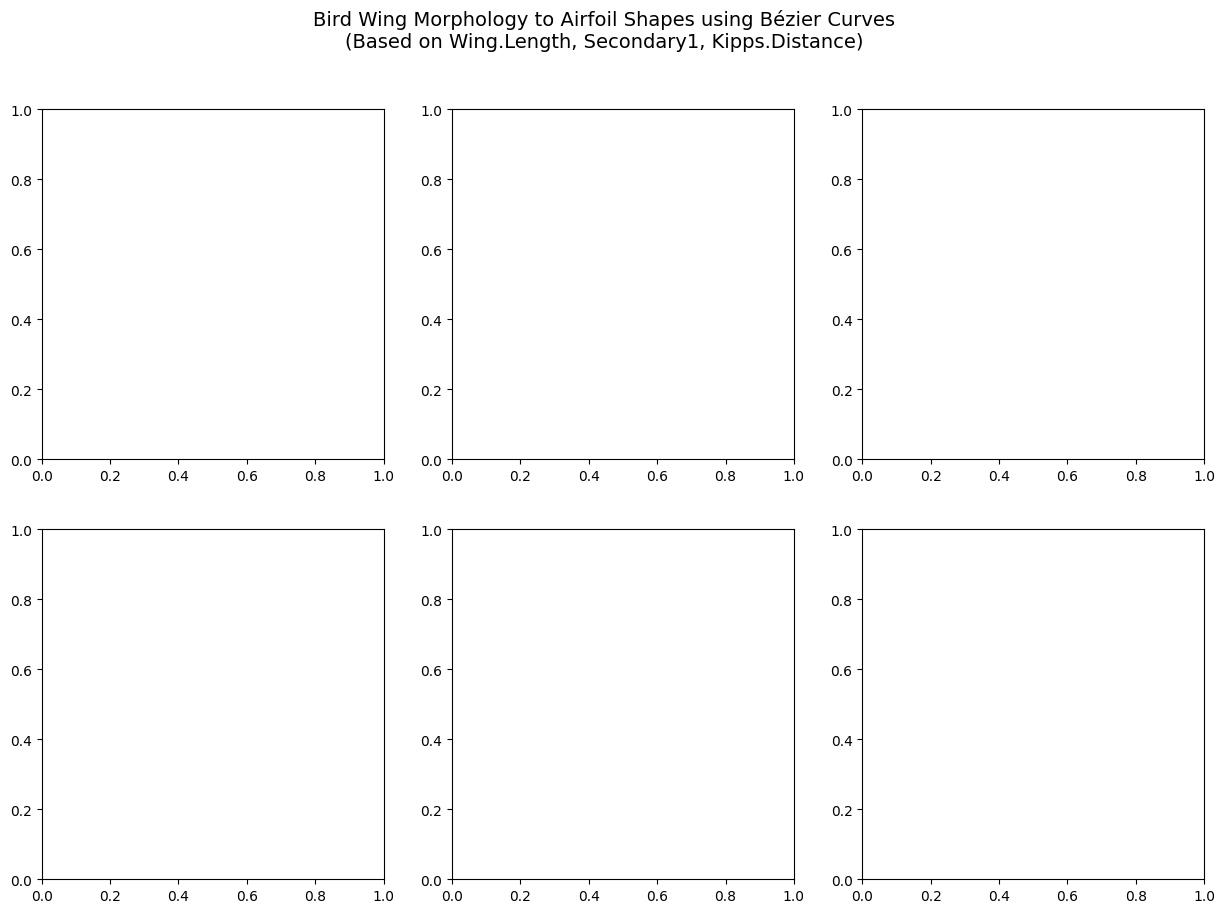

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class BirdAirfoilGenerator:
    def __init__(self):
        self.fig, self.axes = plt.subplots(2, 3, figsize=(15, 10))
        self.fig.suptitle('Bird Wing Morphology to Airfoil Shapes using Bézier Curves\n(Based on Wing.Length, Secondary1, Kipps.Distance)', fontsize=14)
        
    def load_and_process_data(self, csv_path="../Data/AVONET_BIRDLIFE.csv"):
        """Load and process AVONET bird data using exact column names"""
        try:
            df = pd.read_csv(csv_path, encoding='ISO-8859-1')
            print(f"Successfully loaded AVONET data with {len(df)} species")
            
            # Debug: Check what columns are actually in the dataset
            print(f"Available columns: {list(df.columns)}")
            print(f"Looking for: Wing.Length, Secondary1, Kipps.Distance, Hand-Wing.Index, Tail.Length")
            
        except Exception as e:
            print(f"Could not load CSV file: {e}")
            print("Creating sample data based on AVONET structure...")
            df = self.create_sample_avonet_data()
        
        # Use exact column names from your dataset
        required_cols = ['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']
        
        # Check which columns exist
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            print(f"Missing columns: {missing_cols}")
            return self.create_sample_avonet_data()
        
        # Extract the key morphological measurements
        df_clean = df[required_cols].dropna()
        print(f"Using {len(df_clean)} birds with complete morphological data")
        
        # Display some sample species for reference
        print("\nSample species in dataset:")
        print(df_clean[['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance']].head(10))
        
        # Normalize the morphological measurements for airfoil generation
        scaler = MinMaxScaler()
        features = ['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']
        normalized = scaler.fit_transform(df_clean[features])
        normalized_df = pd.DataFrame(normalized, columns=features)
        
        # Add species names for reference
        normalized_df['species'] = df_clean['species'].reset_index(drop=True)
        
        return normalized_df, df_clean, scaler
    
    def create_sample_avonet_data(self):
        """Create sample data matching AVONET structure with realistic bird morphology"""
        np.random.seed(42)
        
        # Define realistic bird types with their morphological characteristics
        bird_types = [
            # [species_name, wing_length, secondary1, kipps_distance, tail_length]
            ("Trochilus_colubris", 45, 25, 20, 15),  # Ruby-throated Hummingbird
            ("Tachycineta_bicolor", 112, 68, 44, 58),  # Tree Swallow  
            ("Turdus_migratorius", 130, 85, 45, 95),  # American Robin
            ("Accipiter_striatus", 165, 95, 70, 140),  # Sharp-shinned Hawk
            ("Buteo_jamaicensis", 380, 220, 160, 190),  # Red-tailed Hawk
            ("Corvus_brachyrhynchos", 270, 180, 90, 175),  # American Crow
            ("Diomedea_exulans", 630, 280, 350, 200),  # Wandering Albatross
            ("Falco_peregrinus", 290, 165, 125, 150),  # Peregrine Falcon
            ("Apus_apus", 165, 85, 80, 75),  # Common Swift
            ("Colibri_thalassinus", 52, 28, 24, 25),  # Green Violet-ear
        ]
        
        # Expand dataset with variations
        expanded_data = []
        for i, (base_species, wl, s1, kd, tl) in enumerate(bird_types):
            for j in range(10):  # Create 10 variations of each type
                variation = np.random.normal(1.0, 0.15)  # 15% variation
                # Add Hand-Wing.Index (typically 20-60 range)
                hand_wing_base = 30 + (kd/wl) * 25  # Relate to pointedness
                expanded_data.append({
                    'species': f"{base_species}_var{j+1}",
                    'Wing.Length': max(20, wl * variation),
                    'Secondary1': max(10, s1 * variation),
                    'Kipps.Distance': max(5, kd * variation),
                    'Hand-Wing.Index': max(15, hand_wing_base * variation),
                    'Tail.Length': max(10, tl * variation)
                })
        
        return pd.DataFrame(expanded_data)
    
    def bezier_curve(self, control_points, num_points=100):
        """Generate Bézier curve from control points"""
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                binomial_coeff = comb(n, j)
                term = binomial_coeff * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += term * control_points[j]
        
        return curve
    
    def generate_airfoil_from_wing_measurements(self, wing_length, secondary1, kipps_distance, hand_wing_index, tail_length):
        """
        Generate airfoil control points based on AVONET wing measurements
        
        Parameters from your morphological diagram:
        - wing_length: Total wing length (measurement 6 in diagram)
        - secondary1: Length of longest secondary feather (measurement 7)  
        - kipps_distance: Wing tip to secondary tip distance (measurement 8)
        - hand_wing_index: Primary feather projection index (relates to wing tip shape)
        - tail_length: Tail length (affects trailing edge)
        """
        
        chord_length = 2.0  # Base chord for visualization
        
        # Calculate morphological ratios (key for airfoil shape)
        secondary_ratio = secondary1 / wing_length if wing_length > 0 else 0.6
        kipps_ratio = kipps_distance / wing_length if wing_length > 0 else 0.3
        wing_pointedness = kipps_ratio  # Higher Kipp's = more pointed wing
        hand_wing_ratio = hand_wing_index  # Normalized hand-wing index
        
        # Airfoil characteristics based on wing morphology:
        
        # 1. Thickness influenced by secondary feather development AND hand-wing index
        # Longer secondaries relative to wing = broader, thicker airfoil
        # Higher hand-wing index = thinner, more efficient airfoil for speed
        max_thickness = 0.06 + secondary_ratio * 0.10 - hand_wing_ratio * 0.04
        max_thickness = max(0.03, max_thickness)  # Minimum thickness
        
        # 2. Camber influenced by wing loading and flight style
        # Higher Kipp's distance suggests fast, efficient flight = more camber
        # Higher hand-wing index also increases camber for efficiency
        camber = 0.015 + kipps_ratio * 0.08 + hand_wing_ratio * 0.06
        
        # 3. Leading edge shape from wing pointedness AND hand-wing characteristics
        # More pointed wings (high Kipp's) = sharper leading edge
        # Higher hand-wing index = even sharper leading edge for cutting through air
        leading_edge_radius = 0.025 - kipps_ratio * 0.015 - hand_wing_ratio * 0.01
        leading_edge_radius = max(0.003, leading_edge_radius)
        
        # 4. Thickness distribution based on secondary arrangement and hand-wing index
        # Well-developed secondaries = thickness further back
        # High hand-wing index = thickness more forward (efficient design)
        max_thickness_position = 0.25 + secondary_ratio * 0.20 - hand_wing_ratio * 0.10
        max_thickness_position = np.clip(max_thickness_position, 0.15, 0.45)
        
        # 5. Camber distribution influenced by hand-wing characteristics
        # High hand-wing index moves max camber forward for efficiency
        max_camber_position = 0.30 + kipps_ratio * 0.15 - hand_wing_ratio * 0.08
        max_camber_position = np.clip(max_camber_position, 0.20, 0.50)
        
        # 6. Trailing edge from tail development
        # Longer tails suggest more gradual trailing edge
        trailing_edge_angle = max(0.002, 0.02 * (1 - tail_length))
        
        # Generate upper surface control points
        upper_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius, max_thickness * 0.8],  # Leading edge curvature
            [max_thickness_position, camber + max_thickness],  # Max thickness region
            [max_camber_position + 0.1, camber + max_thickness * 0.7],  # Post-camber
            [0.7, camber + max_thickness * 0.3],  # Rear section
            [0.95, trailing_edge_angle * 2],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Generate lower surface control points  
        lower_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius * 0.8, -max_thickness * 0.4],  # Leading edge curvature
            [max_thickness_position, camber - max_thickness * 0.9],  # Max thickness region
            [max_camber_position + 0.1, camber - max_thickness * 0.5],  # Post-camber
            [0.7, camber - max_thickness * 0.2],  # Rear section
            [0.95, -trailing_edge_angle],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Scale by chord length
        upper_cp[:, 0] *= chord_length
        lower_cp[:, 0] *= chord_length
        
        return upper_cp, lower_cp
    
    def plot_bird_airfoil_family(self, normalized_df, original_df):
        """Plot airfoils representing different bird wing morphologies"""
        
        # Select 6 birds representing different morphological types
        n_birds = len(normalized_df)
        if n_birds < 6:
            indices = list(range(n_birds))
        else:
            # Select birds with diverse morphology
            indices = [
                0,  # First bird
                n_birds // 6,  # Small wing type
                n_birds // 3,  # Medium wing type  
                n_birds // 2,  # Another type
                2 * n_birds // 3,  # Large wing type
                n_birds - 1  # Last bird
            ]
        
        for plot_idx, bird_idx in enumerate(indices):
            if plot_idx >= 6:
                break
                
            row = plot_idx // 3
            col = plot_idx % 3
            ax = self.axes[row, col]
            
            # Get bird data
            bird_norm = normalized_df.iloc[bird_idx]
            bird_orig = original_df.iloc[bird_idx]
            
            # Debug: Check if Hand-Wing.Index exists in normalized data
            if 'Hand-Wing.Index' not in bird_norm.index:
                print(f"Error: Hand-Wing.Index not found in normalized data")
                print(f"Available columns: {list(bird_norm.index)}")
                return None
            
            wing_length = bird_norm['Wing.Length']
            secondary1 = bird_norm['Secondary1'] 
            kipps_distance = bird_norm['Kipps.Distance']
            hand_wing_index = bird_norm['Hand-Wing.Index']
            tail_length = bird_norm['Tail.Length']
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                wing_length, secondary1, kipps_distance, hand_wing_index, tail_length
            )
            
            # Generate Bézier curves
            upper_curve = self.bezier_curve(upper_cp, 150)
            lower_curve = self.bezier_curve(lower_cp, 150)
            
            # Plot airfoil
            ax.plot(upper_curve[:, 0], upper_curve[:, 1], 'b-', linewidth=2.5, label='Upper surface')
            ax.plot(lower_curve[:, 0], lower_curve[:, 1], 'r-', linewidth=2.5, label='Lower surface')
            
            # Plot control points for reference
            ax.plot(upper_cp[:, 0], upper_cp[:, 1], 'bo--', alpha=0.4, markersize=3)
            ax.plot(lower_cp[:, 0], lower_cp[:, 1], 'ro--', alpha=0.4, markersize=3)
            
            # Fill airfoil
            all_x = np.concatenate([upper_curve[:, 0], lower_curve[::-1, 0]])
            all_y = np.concatenate([upper_curve[:, 1], lower_curve[::-1, 1]])
            ax.fill(all_x, all_y, alpha=0.2, color='lightblue')
            
            # Calculate ratios for display
            sec_ratio = bird_orig['Secondary1'] / bird_orig['Wing.Length']
            kipps_ratio = bird_orig['Kipps.Distance'] / bird_orig['Wing.Length']
            
            # Formatting
            ax.set_xlim(-0.1, 2.1)
            ax.set_ylim(-0.3, 0.3)
            ax.set_aspect('equal')
            ax.grid(True, alpha=0.3)
            
            # Species name and measurements
            species_name = bird_orig['species'][:15] + "..." if len(bird_orig['species']) > 15 else bird_orig['species']
            title = f"{species_name}\n"
            title += f"WL={bird_orig['Wing.Length']:.0f}, HWI={bird_orig['Hand-Wing.Index']:.0f}\n"
            title += f"KD={bird_orig['Kipps.Distance']:.0f}, S1={bird_orig['Secondary1']:.0f}"
            
            ax.set_title(title, fontsize=9)
            ax.set_xlabel('Chord position', fontsize=8)
            ax.set_ylabel('Thickness', fontsize=8)
            
            if plot_idx == 0:
                ax.legend(fontsize=8)
        
        plt.tight_layout()
        return self.fig
    
    def analyze_morphometric_relationships(self, normalized_df, original_df):
        """Analyze relationships between wing measurements and airfoil characteristics"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Wing Morphometry Effects on Airfoil Shape Parameters', fontsize=14)
        
        # Calculate morphological ratios including Hand-Wing Index
        original_df = original_df.copy()
        original_df['Secondary_Ratio'] = original_df['Secondary1'] / original_df['Wing.Length']
        original_df['Kipps_Ratio'] = original_df['Kipps.Distance'] / original_df['Wing.Length']
        original_df['Hand_Wing_Index'] = original_df['Hand-Wing.Index']  # Already a ratio/index
        original_df['Aspect_Estimate'] = original_df['Wing.Length'] ** 2 / (original_df['Wing.Length'] * original_df['Secondary1'])
        
        # Plot 1: Secondary ratio vs wing length
        ax1 = axes[0, 0]
        scatter = ax1.scatter(original_df['Wing.Length'], original_df['Secondary_Ratio'], 
                            c=original_df['Kipps.Distance'], cmap='viridis', alpha=0.6, s=30)
        ax1.set_xlabel('Wing Length (mm)')
        ax1.set_ylabel('Secondary1/Wing.Length Ratio')
        ax1.set_title('Secondary Development vs Wing Size')
        plt.colorbar(scatter, ax=ax1, label='Kipps Distance')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Hand-Wing Index vs wing length  
        ax2 = axes[0, 1]
        scatter2 = ax2.scatter(original_df['Wing.Length'], original_df['Hand_Wing_Index'],
                             c=original_df['Kipps.Distance'], cmap='plasma', alpha=0.6, s=30)
        ax2.set_xlabel('Wing Length (mm)')
        ax2.set_ylabel('Hand-Wing Index')
        ax2.set_title('Wing Efficiency (Hand-Wing Index) vs Size')
        plt.colorbar(scatter2, ax=ax2, label='Kipps Distance')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Demonstrate Hand-Wing Index effect on airfoil
        ax3 = axes[1, 0]
        # Show how different Hand-Wing Index values affect airfoil shape
        hwi_values = [0.2, 0.5, 0.8]  # Low, medium, high efficiency
        colors = ['red', 'green', 'blue']
        for i, hwi in enumerate(hwi_values):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, 0.3, hwi, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax3.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2, 
                    label=f'HWI = {hwi}')
            ax3.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax3.set_xlim(0, 2)
        ax3.set_ylim(-0.2, 0.2)
        ax3.set_title('Hand-Wing Index Effect on Airfoil\n(Higher = More Efficient/Pointed)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_aspect('equal')
        
        # Plot 4: Kipp's distance effect
        ax4 = axes[1, 1]
        kipps_ratios = [0.2, 0.4, 0.6]
        colors = ['orange', 'purple', 'brown']
        for i, kipps_ratio in enumerate(kipps_ratios):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, kipps_ratio, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax4.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2,
                    label=f'Kipps/Wing = {kipps_ratio}')
            ax4.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax4.set_xlim(0, 2)
        ax4.set_ylim(-0.2, 0.2)
        ax4.set_title('Kipps Ratio Effect on Airfoil')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_aspect('equal')
        
        plt.tight_layout()
        return fig
        
    def export_airfoil_coordinates(self, normalized_df, original_df, num_export=5):
        """Export airfoil coordinates for CFD analysis"""
        
        print(f"\nExporting {num_export} representative airfoil coordinate files...")
        
        for i in range(min(num_export, len(normalized_df))):
            bird_norm = normalized_df.iloc[i]
            bird_orig = original_df.iloc[i]
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                bird_norm['Wing.Length'], bird_norm['Secondary1'], 
                bird_norm['Kipps.Distance'], bird_norm['Hand-Wing.Index'], bird_norm['Tail.Length']
            )
            
            # Generate high-resolution curves for CFD
            upper_curve = self.bezier_curve(upper_cp, 200)
            lower_curve = self.bezier_curve(lower_cp, 200)
            
            # Combine upper and lower surfaces (clockwise from trailing edge)
            airfoil_coords = np.vstack([
                upper_curve,
                lower_curve[::-1]  # Reverse lower surface
            ])
            
            # Save coordinates
            species_name = bird_orig['species'].replace(' ', '_').replace('/', '_')[:30]
            filename = f'airfoil_{species_name}_WL{bird_orig["Wing.Length"]:.0f}.dat'
            
            header = f"""# Bird-inspired airfoil: {bird_orig['species']}
# Wing.Length: {bird_orig['Wing.Length']:.1f} mm
# Secondary1: {bird_orig['Secondary1']:.1f} mm  
# Kipps.Distance: {bird_orig['Kipps.Distance']:.1f} mm
# Hand-Wing.Index: {bird_orig['Hand-Wing.Index']:.1f}
# Coordinates: x, y (normalized chord)"""
            
            np.savetxt(filename, airfoil_coords, header=header, fmt='%.6f', delimiter=' ')
            print(f"Saved: {filename}")

def main():
    """Main execution function"""
    print("=== Bird Wing Morphology to Airfoil Shape Generator ===")
    print("Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance\n")
    
    # Initialize generator
    generator = BirdAirfoilGenerator()
    
    # Load and process data
    try:
        normalized_df, original_df, scaler = generator.load_and_process_data()
        print(f"\nSuccessfully processed {len(normalized_df)} bird species")
        
        # Display morphological statistics
        print("\n=== Morphological Statistics (Original Units) ===")
        print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Hand-Wing.Index', 'Tail.Length']].describe())
        
        # Generate airfoil family
        print("\n=== Generating Bird-Inspired Airfoil Shapes ===")
        fig1 = generator.plot_bird_airfoil_family(normalized_df, original_df)
        plt.show()
        
        # Analyze morphometric relationships
        print("\n=== Analyzing Wing Morphometry Effects ===")
        fig2 = generator.analyze_morphometric_relationships(normalized_df, original_df)
        plt.show()
        
        # Export airfoil coordinates for CFD
        generator.export_airfoil_coordinates(normalized_df, original_df, num_export=3)
        
        print("\n=== Analysis Complete ===")
        print("Ready for integration with your RL framework!")
        
    except Exception as e:
        print(f"Error in main execution: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

# version 22

=== Bird Wing Morphology to Airfoil Shape Generator ===
Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance

Successfully loaded AVONET data with 11009 species
Available columns: ['species', 'Genus', 'Family', 'Order', 'Beak.Length_Culmen', 'Beak.Length_Nares', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length', 'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index', 'Tail.Length', 'Mass', 'Mass.Source', 'Inference', 'Habitat', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle']
Looking for: Wing.Length, Secondary1, Kipps.Distance, Hand-Wing.Index, Tail.Length
Using 11009 birds with complete morphological data

Sample species in dataset:
                   species  Wing.Length  Secondary1  Kipps.Distance
0    Accipiter_albogularis        235.2       159.5            81.8
1         Accipiter_badius        186.7       127.4            62.5
2        Accipiter_bicolor        229.6       174.8            56.6
3     Accipiter_brachyurus        202.2       138.1          

Traceback (most recent call last):
  File "/var/folders/vj/sqc4hws93nz6rfgttr2w1fz40000gn/T/ipykernel_24632/3798128867.py", line 405, in main
    print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Hand-Wing.Index', 'Tail.Length']].describe())
          ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/frame.py", line 4108, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 6252, in _raise_if_missing
    raise Key

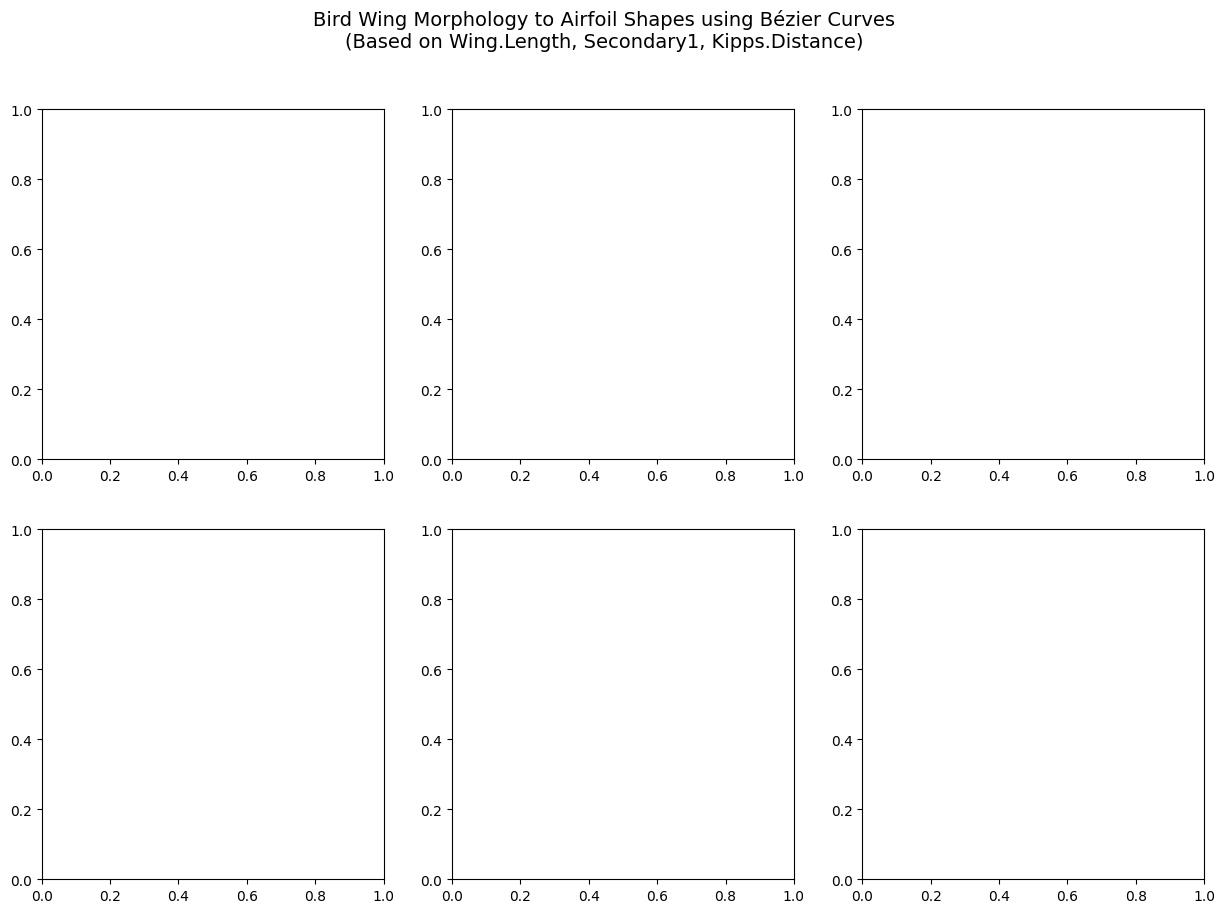

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class BirdAirfoilGenerator:
    def __init__(self):
        self.fig, self.axes = plt.subplots(2, 3, figsize=(15, 10))
        self.fig.suptitle('Bird Wing Morphology to Airfoil Shapes using Bézier Curves\n(Based on Wing.Length, Secondary1, Kipps.Distance)', fontsize=14)
        
    def load_and_process_data(self, csv_path="../Data/AVONET_BIRDLIFE.csv"):
        """Load and process AVONET bird data using exact column names"""
        try:
            df = pd.read_csv(csv_path, encoding='ISO-8859-1')
            print(f"Successfully loaded AVONET data with {len(df)} species")
            
            # Debug: Check what columns are actually in the dataset
            print(f"Available columns: {list(df.columns)}")
            print(f"Looking for: Wing.Length, Secondary1, Kipps.Distance, Hand-Wing.Index, Tail.Length")
            
        except Exception as e:
            print(f"Could not load CSV file: {e}")
            print("Creating sample data based on AVONET structure...")
            df = self.create_sample_avonet_data()
        
        # Use exact column names from your dataset
        required_cols = ['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']
        
        # Check which columns exist
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            print(f"Missing columns: {missing_cols}")
            return self.create_sample_avonet_data()
        
        # Extract the key morphological measurements
        df_clean = df[required_cols].dropna()
        print(f"Using {len(df_clean)} birds with complete morphological data")
        
        # Display some sample species for reference
        print("\nSample species in dataset:")
        print(df_clean[['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance']].head(10))
        
        # Normalize the morphological measurements for airfoil generation
        scaler = MinMaxScaler()
        features = ['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']
        normalized = scaler.fit_transform(df_clean[features])
        normalized_df = pd.DataFrame(normalized, columns=features)
        
        # Add species names for reference
        normalized_df['species'] = df_clean['species'].reset_index(drop=True)
        
        return normalized_df, df_clean, scaler
    
    def create_sample_avonet_data(self):
        """Create sample data matching AVONET structure with realistic bird morphology"""
        np.random.seed(42)
        
        # Define realistic bird types with their morphological characteristics
        bird_types = [
            # [species_name, wing_length, secondary1, kipps_distance, tail_length]
            ("Trochilus_colubris", 45, 25, 20, 15),  # Ruby-throated Hummingbird
            ("Tachycineta_bicolor", 112, 68, 44, 58),  # Tree Swallow  
            ("Turdus_migratorius", 130, 85, 45, 95),  # American Robin
            ("Accipiter_striatus", 165, 95, 70, 140),  # Sharp-shinned Hawk
            ("Buteo_jamaicensis", 380, 220, 160, 190),  # Red-tailed Hawk
            ("Corvus_brachyrhynchos", 270, 180, 90, 175),  # American Crow
            ("Diomedea_exulans", 630, 280, 350, 200),  # Wandering Albatross
            ("Falco_peregrinus", 290, 165, 125, 150),  # Peregrine Falcon
            ("Apus_apus", 165, 85, 80, 75),  # Common Swift
            ("Colibri_thalassinus", 52, 28, 24, 25),  # Green Violet-ear
        ]
        
        # Expand dataset with variations
        expanded_data = []
        for i, (base_species, wl, s1, kd, tl) in enumerate(bird_types):
            for j in range(10):  # Create 10 variations of each type
                variation = np.random.normal(1.0, 0.15)  # 15% variation
                # Add Hand-Wing.Index (typically 20-60 range)
                hand_wing_base = 30 + (kd/wl) * 25  # Relate to pointedness
                expanded_data.append({
                    'species': f"{base_species}_var{j+1}",
                    'Wing.Length': max(20, wl * variation),
                    'Secondary1': max(10, s1 * variation),
                    'Kipps.Distance': max(5, kd * variation),
                    'Hand-Wing.Index': max(15, hand_wing_base * variation),
                    'Tail.Length': max(10, tl * variation)
                })
        
        return pd.DataFrame(expanded_data)
    
    def bezier_curve(self, control_points, num_points=100):
        """Generate Bézier curve from control points"""
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                binomial_coeff = comb(n, j)
                term = binomial_coeff * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += term * control_points[j]
        
        return curve
    
    def generate_airfoil_from_wing_measurements(self, wing_length, secondary1, kipps_distance, hand_wing_index, tail_length):
        """
        Generate airfoil control points based on AVONET wing measurements
        
        Parameters from your morphological diagram:
        - wing_length: Total wing length (measurement 6 in diagram)
        - secondary1: Length of longest secondary feather (measurement 7)  
        - kipps_distance: Wing tip to secondary tip distance (measurement 8)
        - hand_wing_index: Primary feather projection index (relates to wing tip shape)
        - tail_length: Tail length (affects trailing edge)
        """
        
        chord_length = 2.0  # Base chord for visualization
        
        # Calculate morphological ratios (key for airfoil shape)
        secondary_ratio = secondary1 / wing_length if wing_length > 0 else 0.6
        kipps_ratio = kipps_distance / wing_length if wing_length > 0 else 0.3
        wing_pointedness = kipps_ratio  # Higher Kipp's = more pointed wing
        hand_wing_ratio = hand_wing_index  # Normalized hand-wing index
        
        # Airfoil characteristics based on wing morphology:
        
        # 1. Thickness influenced by secondary feather development AND hand-wing index
        # Longer secondaries relative to wing = broader, thicker airfoil
        # Higher hand-wing index = thinner, more efficient airfoil for speed
        max_thickness = 0.06 + secondary_ratio * 0.10 - hand_wing_ratio * 0.04
        max_thickness = max(0.03, max_thickness)  # Minimum thickness
        
        # 2. Camber influenced by wing loading and flight style
        # Higher Kipp's distance suggests fast, efficient flight = more camber
        # Higher hand-wing index also increases camber for efficiency
        camber = 0.015 + kipps_ratio * 0.08 + hand_wing_ratio * 0.06
        
        # 3. Leading edge shape from wing pointedness AND hand-wing characteristics
        # More pointed wings (high Kipp's) = sharper leading edge
        # Higher hand-wing index = even sharper leading edge for cutting through air
        leading_edge_radius = 0.025 - kipps_ratio * 0.015 - hand_wing_ratio * 0.01
        leading_edge_radius = max(0.003, leading_edge_radius)
        
        # 4. Thickness distribution based on secondary arrangement and hand-wing index
        # Well-developed secondaries = thickness further back
        # High hand-wing index = thickness more forward (efficient design)
        max_thickness_position = 0.25 + secondary_ratio * 0.20 - hand_wing_ratio * 0.10
        max_thickness_position = np.clip(max_thickness_position, 0.15, 0.45)
        
        # 5. Camber distribution influenced by hand-wing characteristics
        # High hand-wing index moves max camber forward for efficiency
        max_camber_position = 0.30 + kipps_ratio * 0.15 - hand_wing_ratio * 0.08
        max_camber_position = np.clip(max_camber_position, 0.20, 0.50)
        
        # 6. Trailing edge from tail development
        # Longer tails suggest more gradual trailing edge
        trailing_edge_angle = max(0.002, 0.02 * (1 - tail_length))
        
        # Generate upper surface control points
        upper_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius, max_thickness * 0.8],  # Leading edge curvature
            [max_thickness_position, camber + max_thickness],  # Max thickness region
            [max_camber_position + 0.1, camber + max_thickness * 0.7],  # Post-camber
            [0.7, camber + max_thickness * 0.3],  # Rear section
            [0.95, trailing_edge_angle * 2],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Generate lower surface control points  
        lower_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius * 0.8, -max_thickness * 0.4],  # Leading edge curvature
            [max_thickness_position, camber - max_thickness * 0.9],  # Max thickness region
            [max_camber_position + 0.1, camber - max_thickness * 0.5],  # Post-camber
            [0.7, camber - max_thickness * 0.2],  # Rear section
            [0.95, -trailing_edge_angle],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Scale by chord length
        upper_cp[:, 0] *= chord_length
        lower_cp[:, 0] *= chord_length
        
        return upper_cp, lower_cp
    
    def plot_bird_airfoil_family(self, normalized_df, original_df):
        """Plot airfoils representing different bird wing morphologies"""
        
        # Select 6 birds representing different morphological types
        n_birds = len(normalized_df)
        if n_birds < 6:
            indices = list(range(n_birds))
        else:
            # Select birds with diverse morphology
            indices = [
                0,  # First bird
                n_birds // 6,  # Small wing type
                n_birds // 3,  # Medium wing type  
                n_birds // 2,  # Another type
                2 * n_birds // 3,  # Large wing type
                n_birds - 1  # Last bird
            ]
        
        for plot_idx, bird_idx in enumerate(indices):
            if plot_idx >= 6:
                break
                
            row = plot_idx // 3
            col = plot_idx % 3
            ax = self.axes[row, col]
            
            # Get bird data
            bird_norm = normalized_df.iloc[bird_idx]
            bird_orig = original_df.iloc[bird_idx]
            
            # Debug: Check if Hand-Wing.Index exists in normalized data
            if 'Hand-Wing.Index' not in bird_norm.index:
                print(f"Error: Hand-Wing.Index not found in normalized data")
                print(f"Available columns: {list(bird_norm.index)}")
                return None
            
            wing_length = bird_norm['Wing.Length']
            secondary1 = bird_norm['Secondary1'] 
            kipps_distance = bird_norm['Kipps.Distance']
            hand_wing_index = bird_norm['Hand-Wing.Index']
            tail_length = bird_norm['Tail.Length']
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                wing_length, secondary1, kipps_distance, hand_wing_index, tail_length
            )
            
            # Generate Bézier curves
            upper_curve = self.bezier_curve(upper_cp, 150)
            lower_curve = self.bezier_curve(lower_cp, 150)
            
            # Plot airfoil
            ax.plot(upper_curve[:, 0], upper_curve[:, 1], 'b-', linewidth=2.5, label='Upper surface')
            ax.plot(lower_curve[:, 0], lower_curve[:, 1], 'r-', linewidth=2.5, label='Lower surface')
            
            # Plot control points for reference
            ax.plot(upper_cp[:, 0], upper_cp[:, 1], 'bo--', alpha=0.4, markersize=3)
            ax.plot(lower_cp[:, 0], lower_cp[:, 1], 'ro--', alpha=0.4, markersize=3)
            
            # Fill airfoil
            all_x = np.concatenate([upper_curve[:, 0], lower_curve[::-1, 0]])
            all_y = np.concatenate([upper_curve[:, 1], lower_curve[::-1, 1]])
            ax.fill(all_x, all_y, alpha=0.2, color='lightblue')
            
            # Calculate ratios for display
            sec_ratio = bird_orig['Secondary1'] / bird_orig['Wing.Length']
            kipps_ratio = bird_orig['Kipps.Distance'] / bird_orig['Wing.Length']
            
            # Formatting
            ax.set_xlim(-0.1, 2.1)
            ax.set_ylim(-0.3, 0.3)
            ax.set_aspect('equal')
            ax.grid(True, alpha=0.3)
            
            # Species name and measurements
            species_name = bird_orig['species'][:15] + "..." if len(bird_orig['species']) > 15 else bird_orig['species']
            title = f"{species_name}\n"
            title += f"WL={bird_orig['Wing.Length']:.0f}, HWI={bird_orig['Hand-Wing.Index']:.0f}\n"
            title += f"KD={bird_orig['Kipps.Distance']:.0f}, S1={bird_orig['Secondary1']:.0f}"
            
            ax.set_title(title, fontsize=9)
            ax.set_xlabel('Chord position', fontsize=8)
            ax.set_ylabel('Thickness', fontsize=8)
            
            if plot_idx == 0:
                ax.legend(fontsize=8)
        
        plt.tight_layout()
        return self.fig
    
    def analyze_morphometric_relationships(self, normalized_df, original_df):
        """Analyze relationships between wing measurements and airfoil characteristics"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Wing Morphometry Effects on Airfoil Shape Parameters', fontsize=14)
        
        # Calculate morphological ratios including Hand-Wing Index
        original_df = original_df.copy()
        original_df['Secondary_Ratio'] = original_df['Secondary1'] / original_df['Wing.Length']
        original_df['Kipps_Ratio'] = original_df['Kipps.Distance'] / original_df['Wing.Length']
        original_df['Hand_Wing_Index'] = original_df['Hand-Wing.Index']  # Already a ratio/index
        original_df['Aspect_Estimate'] = original_df['Wing.Length'] ** 2 / (original_df['Wing.Length'] * original_df['Secondary1'])
        
        # Plot 1: Secondary ratio vs wing length
        ax1 = axes[0, 0]
        scatter = ax1.scatter(original_df['Wing.Length'], original_df['Secondary_Ratio'], 
                            c=original_df['Kipps.Distance'], cmap='viridis', alpha=0.6, s=30)
        ax1.set_xlabel('Wing Length (mm)')
        ax1.set_ylabel('Secondary1/Wing.Length Ratio')
        ax1.set_title('Secondary Development vs Wing Size')
        plt.colorbar(scatter, ax=ax1, label='Kipps Distance')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Hand-Wing Index vs wing length  
        ax2 = axes[0, 1]
        scatter2 = ax2.scatter(original_df['Wing.Length'], original_df['Hand_Wing_Index'],
                             c=original_df['Kipps.Distance'], cmap='plasma', alpha=0.6, s=30)
        ax2.set_xlabel('Wing Length (mm)')
        ax2.set_ylabel('Hand-Wing Index')
        ax2.set_title('Wing Efficiency (Hand-Wing Index) vs Size')
        plt.colorbar(scatter2, ax=ax2, label='Kipps Distance')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Demonstrate Hand-Wing Index effect on airfoil
        ax3 = axes[1, 0]
        # Show how different Hand-Wing Index values affect airfoil shape
        hwi_values = [0.2, 0.5, 0.8]  # Low, medium, high efficiency
        colors = ['red', 'green', 'blue']
        for i, hwi in enumerate(hwi_values):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, 0.3, hwi, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax3.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2, 
                    label=f'HWI = {hwi}')
            ax3.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax3.set_xlim(0, 2)
        ax3.set_ylim(-0.2, 0.2)
        ax3.set_title('Hand-Wing Index Effect on Airfoil\n(Higher = More Efficient/Pointed)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_aspect('equal')
        
        # Plot 4: Kipp's distance effect
        ax4 = axes[1, 1]
        kipps_ratios = [0.2, 0.4, 0.6]
        colors = ['orange', 'purple', 'brown']
        for i, kipps_ratio in enumerate(kipps_ratios):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, kipps_ratio, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax4.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2,
                    label=f'Kipps/Wing = {kipps_ratio}')
            ax4.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax4.set_xlim(0, 2)
        ax4.set_ylim(-0.2, 0.2)
        ax4.set_title('Kipps Ratio Effect on Airfoil')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_aspect('equal')
        
        plt.tight_layout()
        return fig
        
    def export_airfoil_coordinates(self, normalized_df, original_df, num_export=5):
        """Export airfoil coordinates for CFD analysis"""
        
        print(f"\nExporting {num_export} representative airfoil coordinate files...")
        
        for i in range(min(num_export, len(normalized_df))):
            bird_norm = normalized_df.iloc[i]
            bird_orig = original_df.iloc[i]
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                bird_norm['Wing.Length'], bird_norm['Secondary1'], 
                bird_norm['Kipps.Distance'], bird_norm['Hand-Wing.Index'], bird_norm['Tail.Length']
            )
            
            # Generate high-resolution curves for CFD
            upper_curve = self.bezier_curve(upper_cp, 200)
            lower_curve = self.bezier_curve(lower_cp, 200)
            
            # Combine upper and lower surfaces (clockwise from trailing edge)
            airfoil_coords = np.vstack([
                upper_curve,
                lower_curve[::-1]  # Reverse lower surface
            ])
            
            # Save coordinates
            species_name = bird_orig['species'].replace(' ', '_').replace('/', '_')[:30]
            filename = f'airfoil_{species_name}_WL{bird_orig["Wing.Length"]:.0f}.dat'
            
            header = f"""# Bird-inspired airfoil: {bird_orig['species']}
# Wing.Length: {bird_orig['Wing.Length']:.1f} mm
# Secondary1: {bird_orig['Secondary1']:.1f} mm  
# Kipps.Distance: {bird_orig['Kipps.Distance']:.1f} mm
# Hand-Wing.Index: {bird_orig['Hand-Wing.Index']:.1f}
# Coordinates: x, y (normalized chord)"""
            
            np.savetxt(filename, airfoil_coords, header=header, fmt='%.6f', delimiter=' ')
            print(f"Saved: {filename}")

def main():
    """Main execution function"""
    print("=== Bird Wing Morphology to Airfoil Shape Generator ===")
    print("Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance\n")
    
    # Initialize generator
    generator = BirdAirfoilGenerator()
    
    # Load and process data
    try:
        normalized_df, original_df, scaler = generator.load_and_process_data()
        print(f"\nSuccessfully processed {len(normalized_df)} bird species")
        
        # Display morphological statistics
        print("\n=== Morphological Statistics (Original Units) ===")
        print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Hand-Wing.Index', 'Tail.Length']].describe())
        
        # Generate airfoil family
        print("\n=== Generating Bird-Inspired Airfoil Shapes ===")
        fig1 = generator.plot_bird_airfoil_family(normalized_df, original_df)
        plt.show()
        
        # Analyze morphometric relationships
        print("\n=== Analyzing Wing Morphometry Effects ===")
        fig2 = generator.analyze_morphometric_relationships(normalized_df, original_df)
        plt.show()
        
        # Export airfoil coordinates for CFD
        generator.export_airfoil_coordinates(normalized_df, original_df, num_export=3)
        
        print("\n=== Analysis Complete ===")
        print("Ready for integration with your RL framework!")
        
    except Exception as e:
        print(f"Error in main execution: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()